# Exploratory Data Analysis

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)

import datetime
    
# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 250 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
color = sns.color_palette()

from utils import *

#Data file directory
root = 'C:/Users/ALEXANDER/Documents/Machine Learning/Instacart/Data/'

In [2]:
# Converting the days and hours from numbers to their interpretable form
days_of_week = {0: 'Saturday', 
                1: 'Sunday', 
                2: 'Monday',
                3: 'Tuesday',
                4: 'Wednesday',
                5: 'Thursday',
                6: 'Friday'}
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}

In [3]:
#Read datasets
aisles = read(root,path='aisles')
departments = read(root,path='departments')
orders = read(root,path='orders')
order_products_prior = read(root,path='order_products__prior')
order_products_train = read(root,path='order_products__train')
products = read(root,path="products")

In [4]:
orders['order_hour_of_day'] = orders['order_hour_of_day'].replace(to_replace=hours_of_day, value=None)
orders['order_hour_of_day'] = pd.Categorical(orders['order_hour_of_day'], 
                                             ordered=True, 
                                             categories=list(hours_of_day.values()))
# Replacing numbers with their corresponding day of week
# Define the categories of days of week sorted normally from Saturday to Friday
orders['order_dow'] = orders['order_dow'].replace(to_replace=days_of_week, value=None)
orders['order_dow'] = pd.Categorical(orders['order_dow'], 
                                     ordered=True, 
                                     categories=list(days_of_week.values()))
orders = reduce_memory(orders)

Memory usage of properties dataframe is : 137.03033256530762  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  68.51575374603271  MB
This is  50.00042871046717 % of the initial size


To make analysis easier, I will combine order_products_train and order_products_prior into a new dataset. I will also merged the newly created dataset with the metadata using `order_id`, `product_id`, `aisle_id` and `department_id` as keys. Thus creating a single dataframe.

In [5]:
combined_order = pd.concat([order_products_prior,order_products_train],0)
combined_order.shape

(33819106, 4)

In [6]:
organic = products['product_name'].str.contains('Organic')
products['is_organic'] = organic

combined_order = combined_order.merge(products, on ='product_id', how='left')
combined_order = combined_order.merge(orders, on='order_id', how='left')
combined_order = combined_order.merge(departments, on ='department_id', how='left')
combined_order = combined_order.merge(aisles, on ='aisle_id', how='left')
combined_order.shape

(33819106, 16)

In [7]:
#Preview combined data
combined_order.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,True,202279,prior,3,Thursday,09:00 AM,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,True,202279,prior,3,Thursday,09:00 AM,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,False,202279,prior,3,Thursday,09:00 AM,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,False,202279,prior,3,Thursday,09:00 AM,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,False,202279,prior,3,Thursday,09:00 AM,8.0,pantry,baking ingredients


In [8]:
combined_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 16 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   product_name            object  
 5   aisle_id                int64   
 6   department_id           int64   
 7   is_organic              bool    
 8   user_id                 int32   
 9   eval_set                object  
 10  order_number            int8    
 11  order_dow               category
 12  order_hour_of_day       category
 13  days_since_prior_order  float16 
 14  department              object  
 15  aisle                   object  
dtypes: bool(1), category(2), float16(1), int32(1), int64(6), int8(1), object(4)
memory usage: 3.1+ GB


### Optimizating Memory Usage
**Reduce memory usage**: Due to the size of the dataset, there is a need to reduce memory allocation in order to speed up analysis and aggregation. In `utils.py`, I have implemented a memory reduction function. 
I will also delete variables that are no longer useful to free up more memory!

In [9]:
combined_order = reduce_memory(combined_order)

Memory usage of properties dataframe is : 3160.737506866455  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2064.155471801758  MB
This is  65.30613400567246 % of the initial size


In [10]:
# Delete variables that are not needed anymore.
del products, orders, order_products_prior, order_products_train, aisles, departments, reduce_memory, root
%whos

Variable         Type             Data/Info
-------------------------------------------
annotate_text    function         <function annotate_text at 0x00000159F11CA4C0>
bar_visual       function         <function bar_visual at 0x00000159F11CA1F0>
color            _ColorPalette    [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
combined_order   DataFrame                  order_id  produ<...>819106 rows x 16 columns]
count_viz        function         <function count_viz at 0x00000159F11CA280>
datetime         module           <module 'datetime' from '<...>onda3\\lib\\datetime.py'>
days_of_week     dict             n=7
gc               module           <module 'gc' (built-in)>
hour_nums        list             n=24
hours_of_day     dict             n=24
matplotlib       module           <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np               module           <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
organic          Series           0        False\n1

## Reorder Analysis by Aisle
**An aisle is a long narrow gap that people can walk along between rows of shelves in a supermarket.**

In [11]:
total_df = combined_order.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
total_df = total_df.sort_values('total', ascending=False).reset_index()

Here, I have counted the sum of reordered items in an aisle/shelf. I will be analyzing the aisles with the most reorder rate. i.e. aisles which customers revisit to buy products.

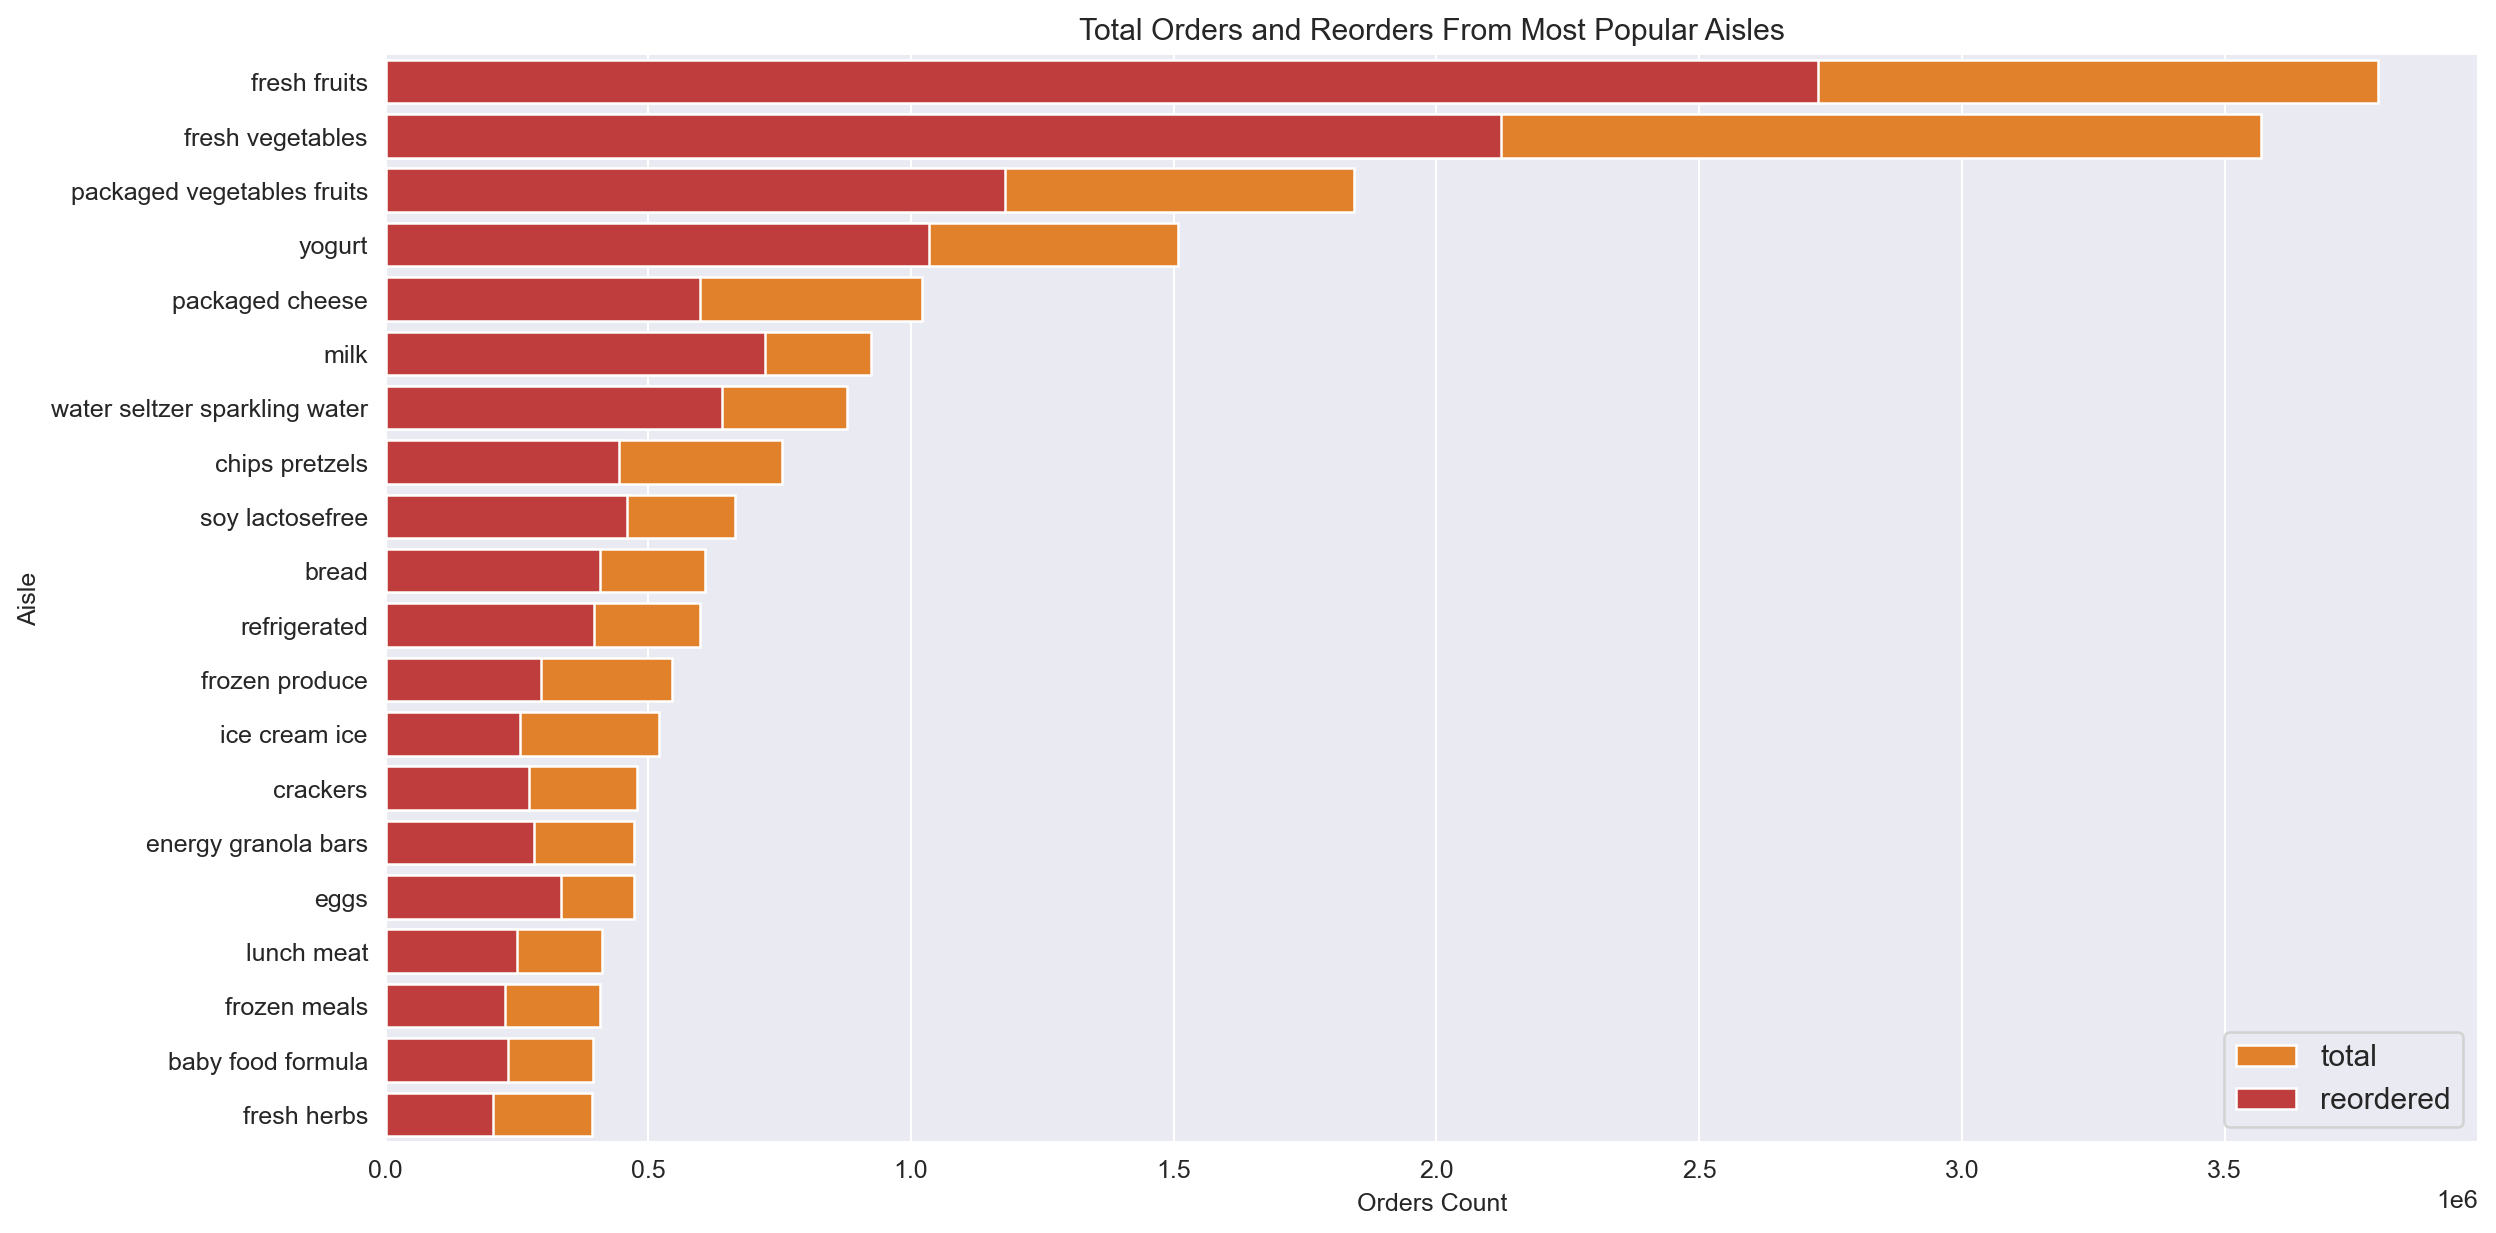

In [12]:
#Visualization of top 20 aisles whose products were reordered by customers
overlapped_bar(y_df=total_df['aisle'][0:20],x1_df=total_df['total'][0:20],
               x2_df= total_df['reorders'][0:20], xlabel="Orders Count",
               ylabel="Aisle",title="Total Orders and Reorders From Most Popular Aisles")

In [13]:
#Top 10 products with highest reorder ratio
total_df["ratio_of_reorder"] = total_df['reorders']/total_df['total']
sorted_reorder_aisle = total_df.sort_values("ratio_of_reorder", ascending=False)
sorted_reorder_aisle.head(10)

,aisle,total,reorders,ratio_of_reorder
5,milk,923659,722128.0,0.781812
6,water seltzer sparkling water,878150,640988.0,0.729930
0,fresh fruits,3792661,2726251.0,0.718823
15,eggs,472009,333408.0,0.706359
8,soy lactosefree,664493,460069.0,0.692361
33,packaged produce,289488,200319.0,0.691977
3,yogurt,1507583,1034957.0,0.686501
26,cream,330358,226356.0,0.685184
9,bread,608469,408010.0,0.670552
10,refrigerated,599109,397213.0,0.663006


- Majority of the aisles with high reorder rates contains diary products,vegetables and liquid drinks.


Let's visualize the top 20 Aisles with the highest reorder ratio

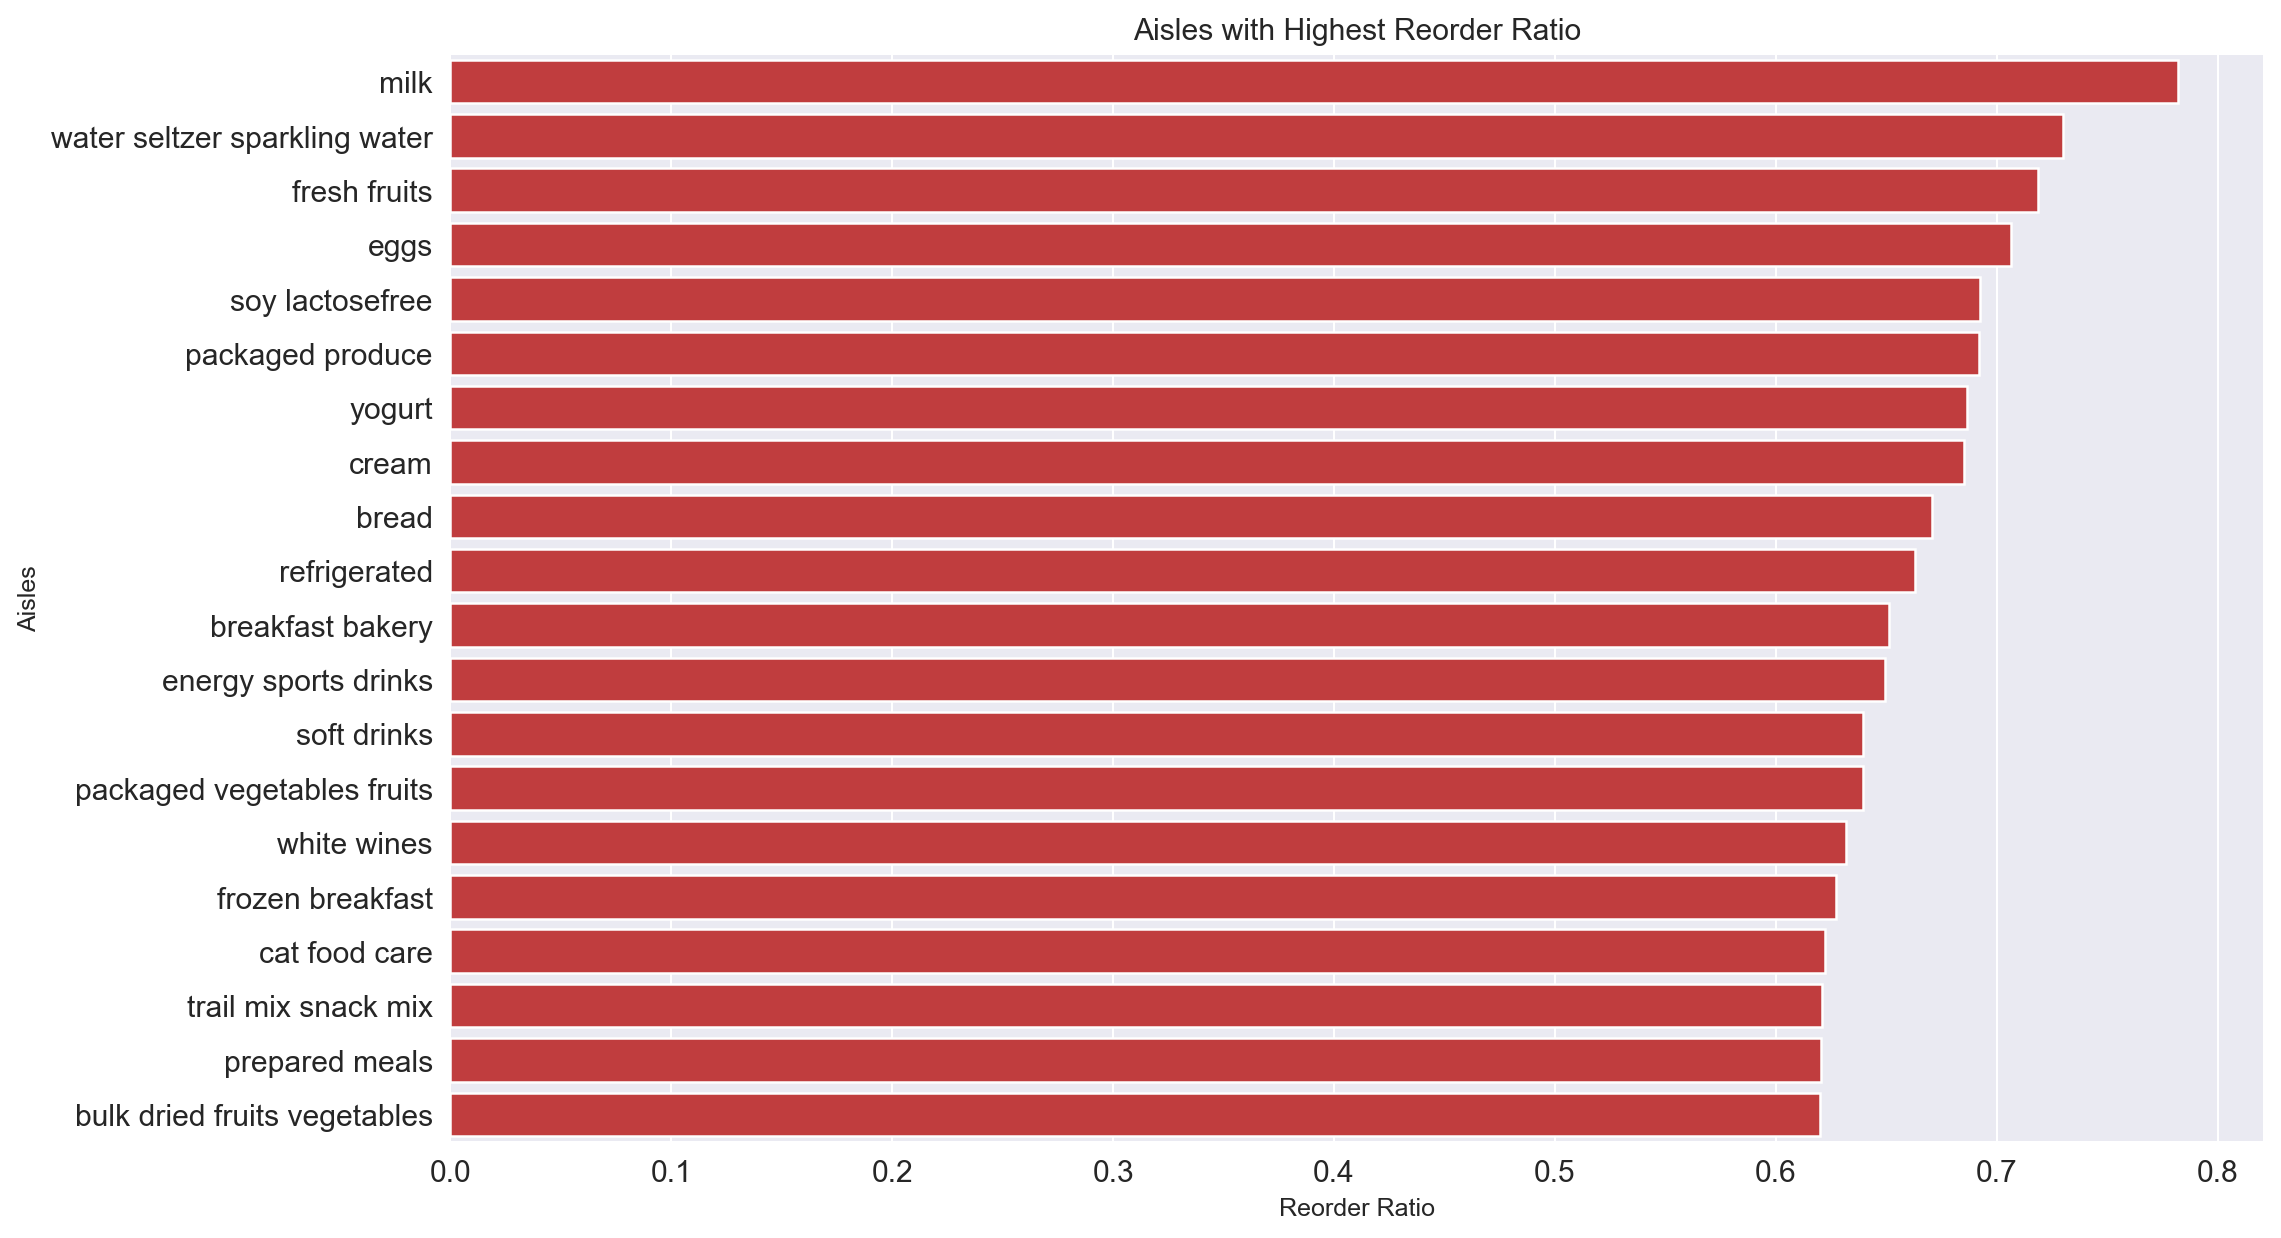

In [14]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = sorted_reorder_aisle['aisle'][:20], x = sorted_reorder_aisle['ratio_of_reorder'][:20], color=color[3])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

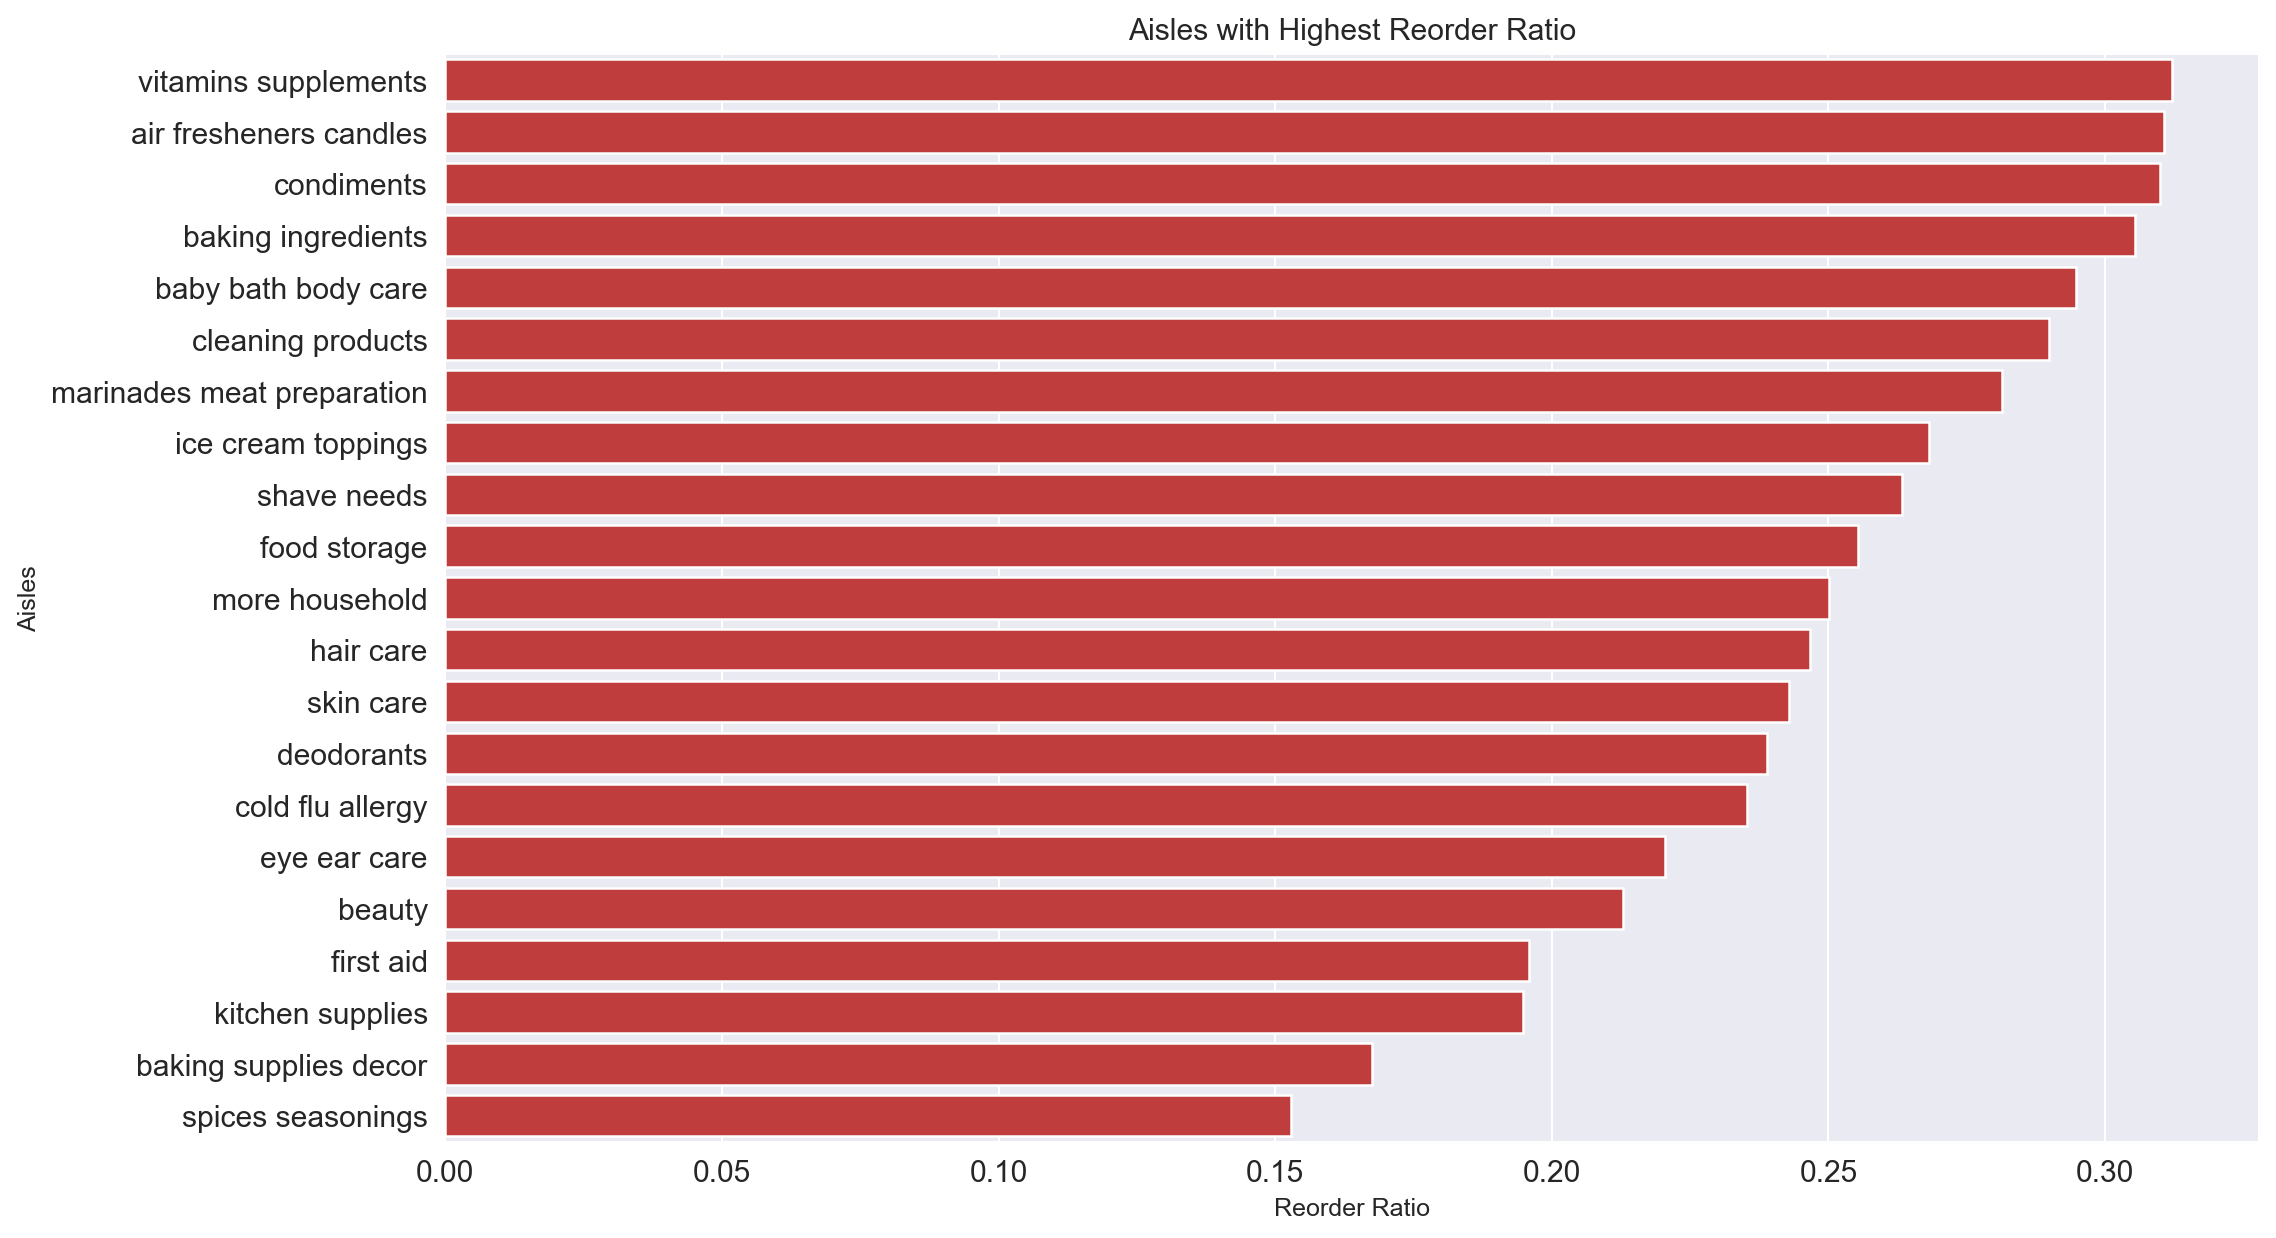

In [15]:
#Bottom 20 aisles with lowest reorder ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = sorted_reorder_aisle['aisle'][-21:], x = sorted_reorder_aisle['ratio_of_reorder'][-21:], color=color[3])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

Aisles/shelves containing kitchen spices, beauty products and household supplies had the least reorder rate. This is because most of this products take a long time to consume or finish.

## Purchasing Behaviour Analysis by Departments

A department represents a section in a grocery store that is dedicated to specific kinds of products e.g `household` sections for household items and `frozen` section for frozen food and seafood.

In [16]:
total_df = combined_order.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
total_df = total_df.sort_values('total', ascending=False).reset_index()

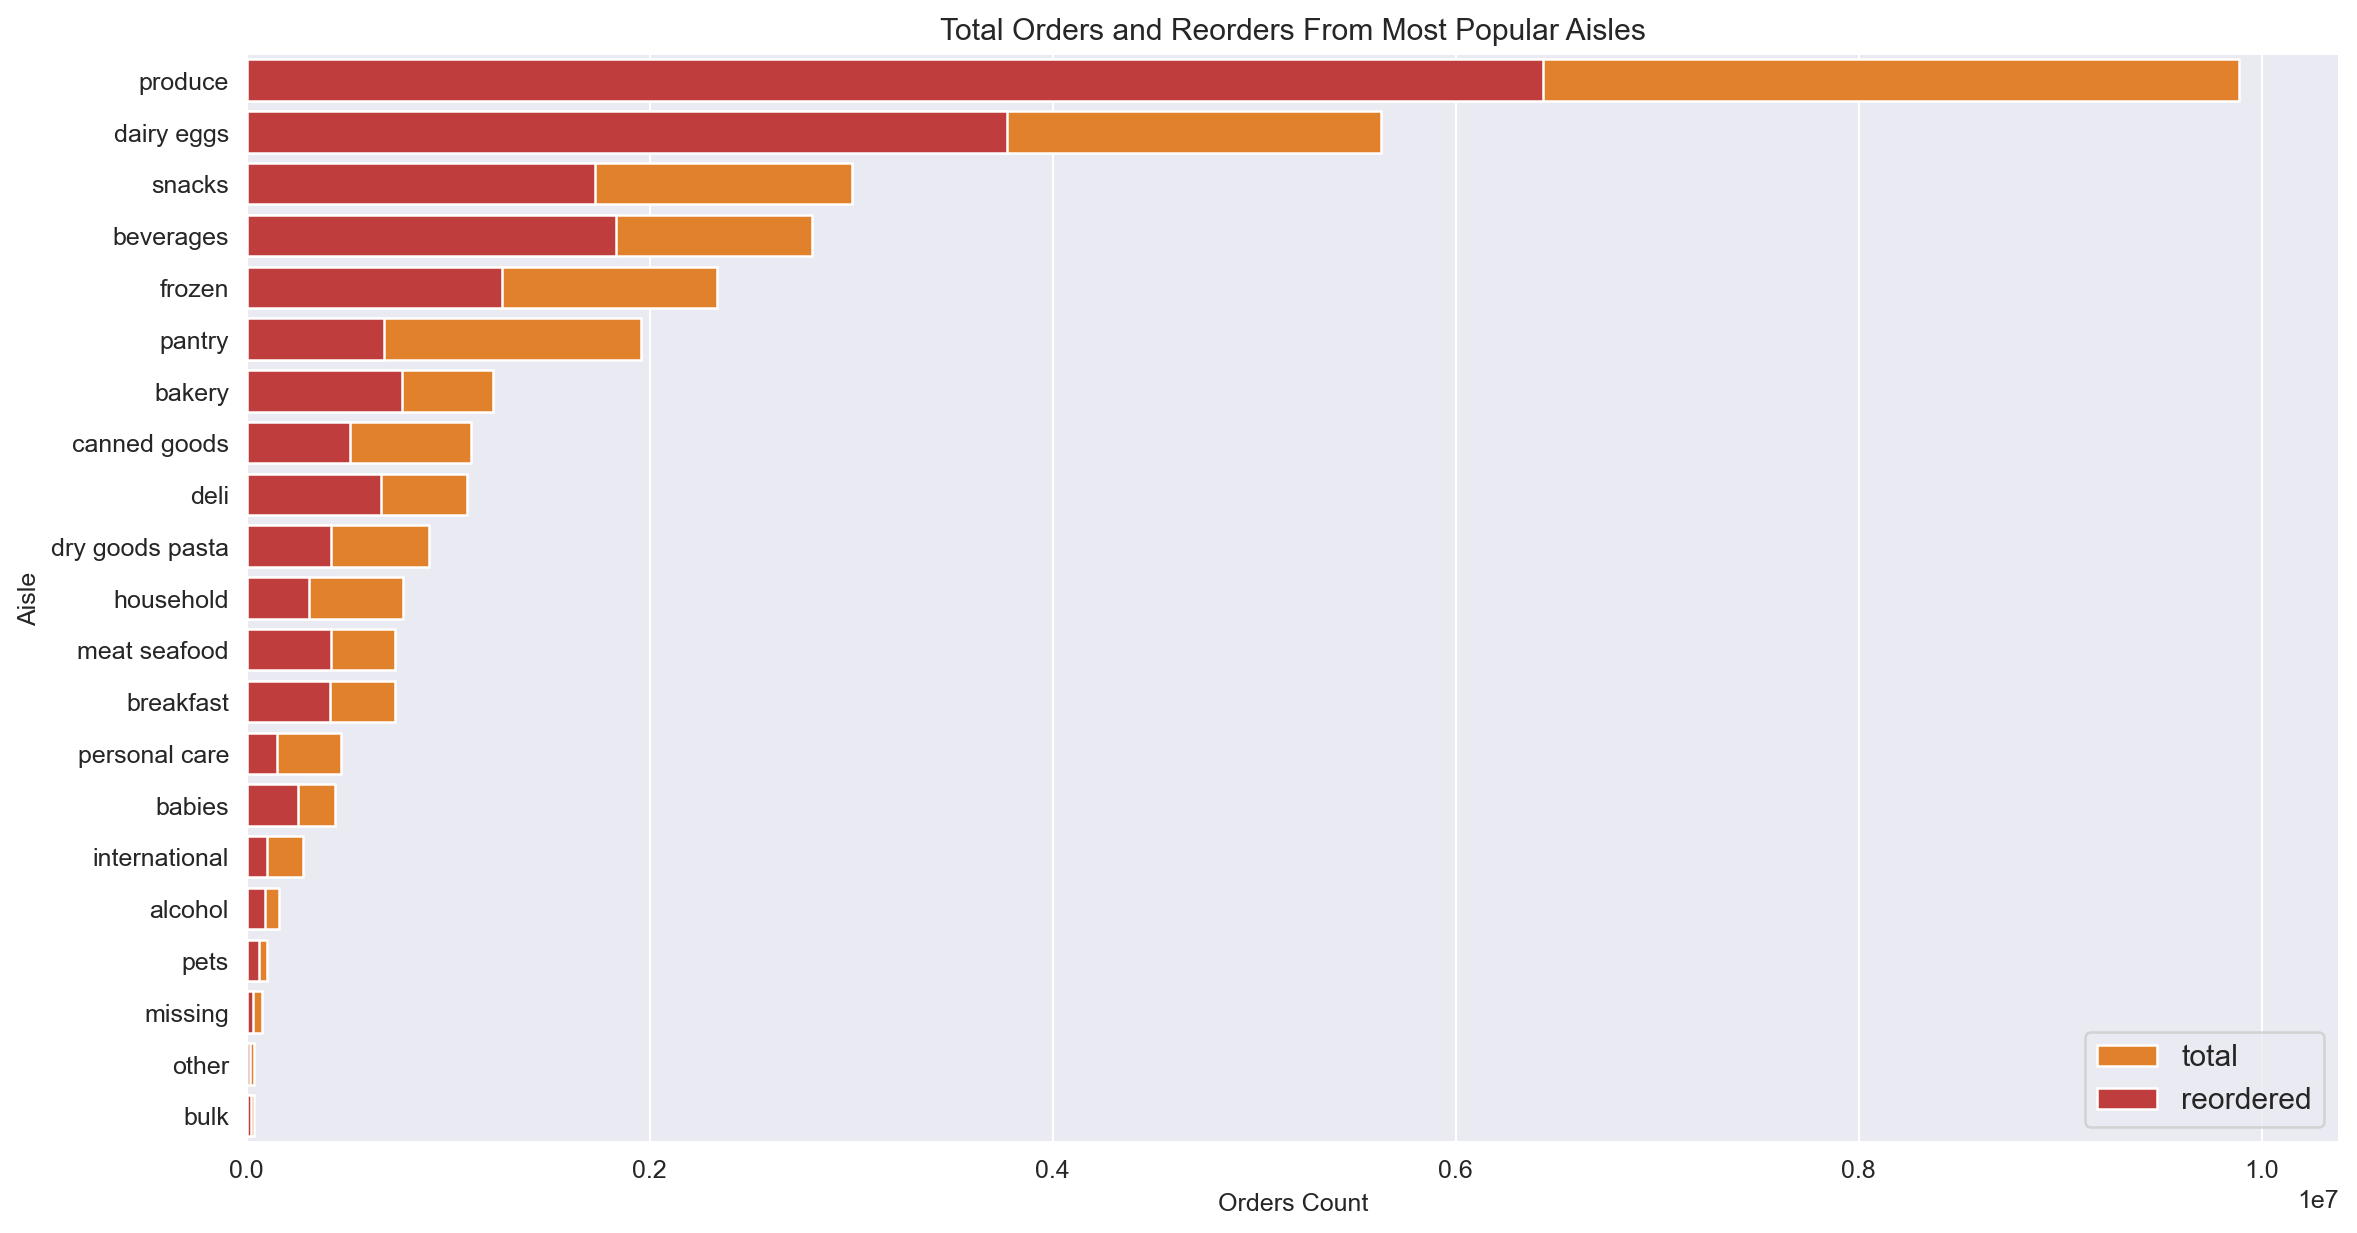

In [17]:
#Visualize top departments in grocery store with most reorder
overlapped_bar(y_df=total_df['department'],x1_df=total_df['total'],
               x2_df= total_df['reorders'], xlabel="Orders Count",
               ylabel="Department",title="Total Orders and Reorders From Departments")

In [18]:
#Top 10 products with highest reorder ratio
total_df["ratio_of_reorder"] = total_df['reorders']/total_df['total']
sorted_reorder_dept = total_df.sort_values("ratio_of_reorder", ascending=False).reset_index(drop=True)
sorted_reorder_dept.head(10)

,department,total,reorders,ratio_of_reorder
0,dairy eggs,5631067,3773723.0,0.670161
1,beverages,2804175,1832952.0,0.653651
2,produce,9888378,6432596.0,0.650521
3,bakery,1225181,769880.0,0.628381
4,deli,1095540,666231.0,0.608130
5,pets,102221,61594.0,0.602557
6,babies,438743,253453.0,0.577680
7,bulk,35932,20736.0,0.577090
8,snacks,3006412,1727075.0,0.574464
9,alcohol,159294,90992.0,0.571221


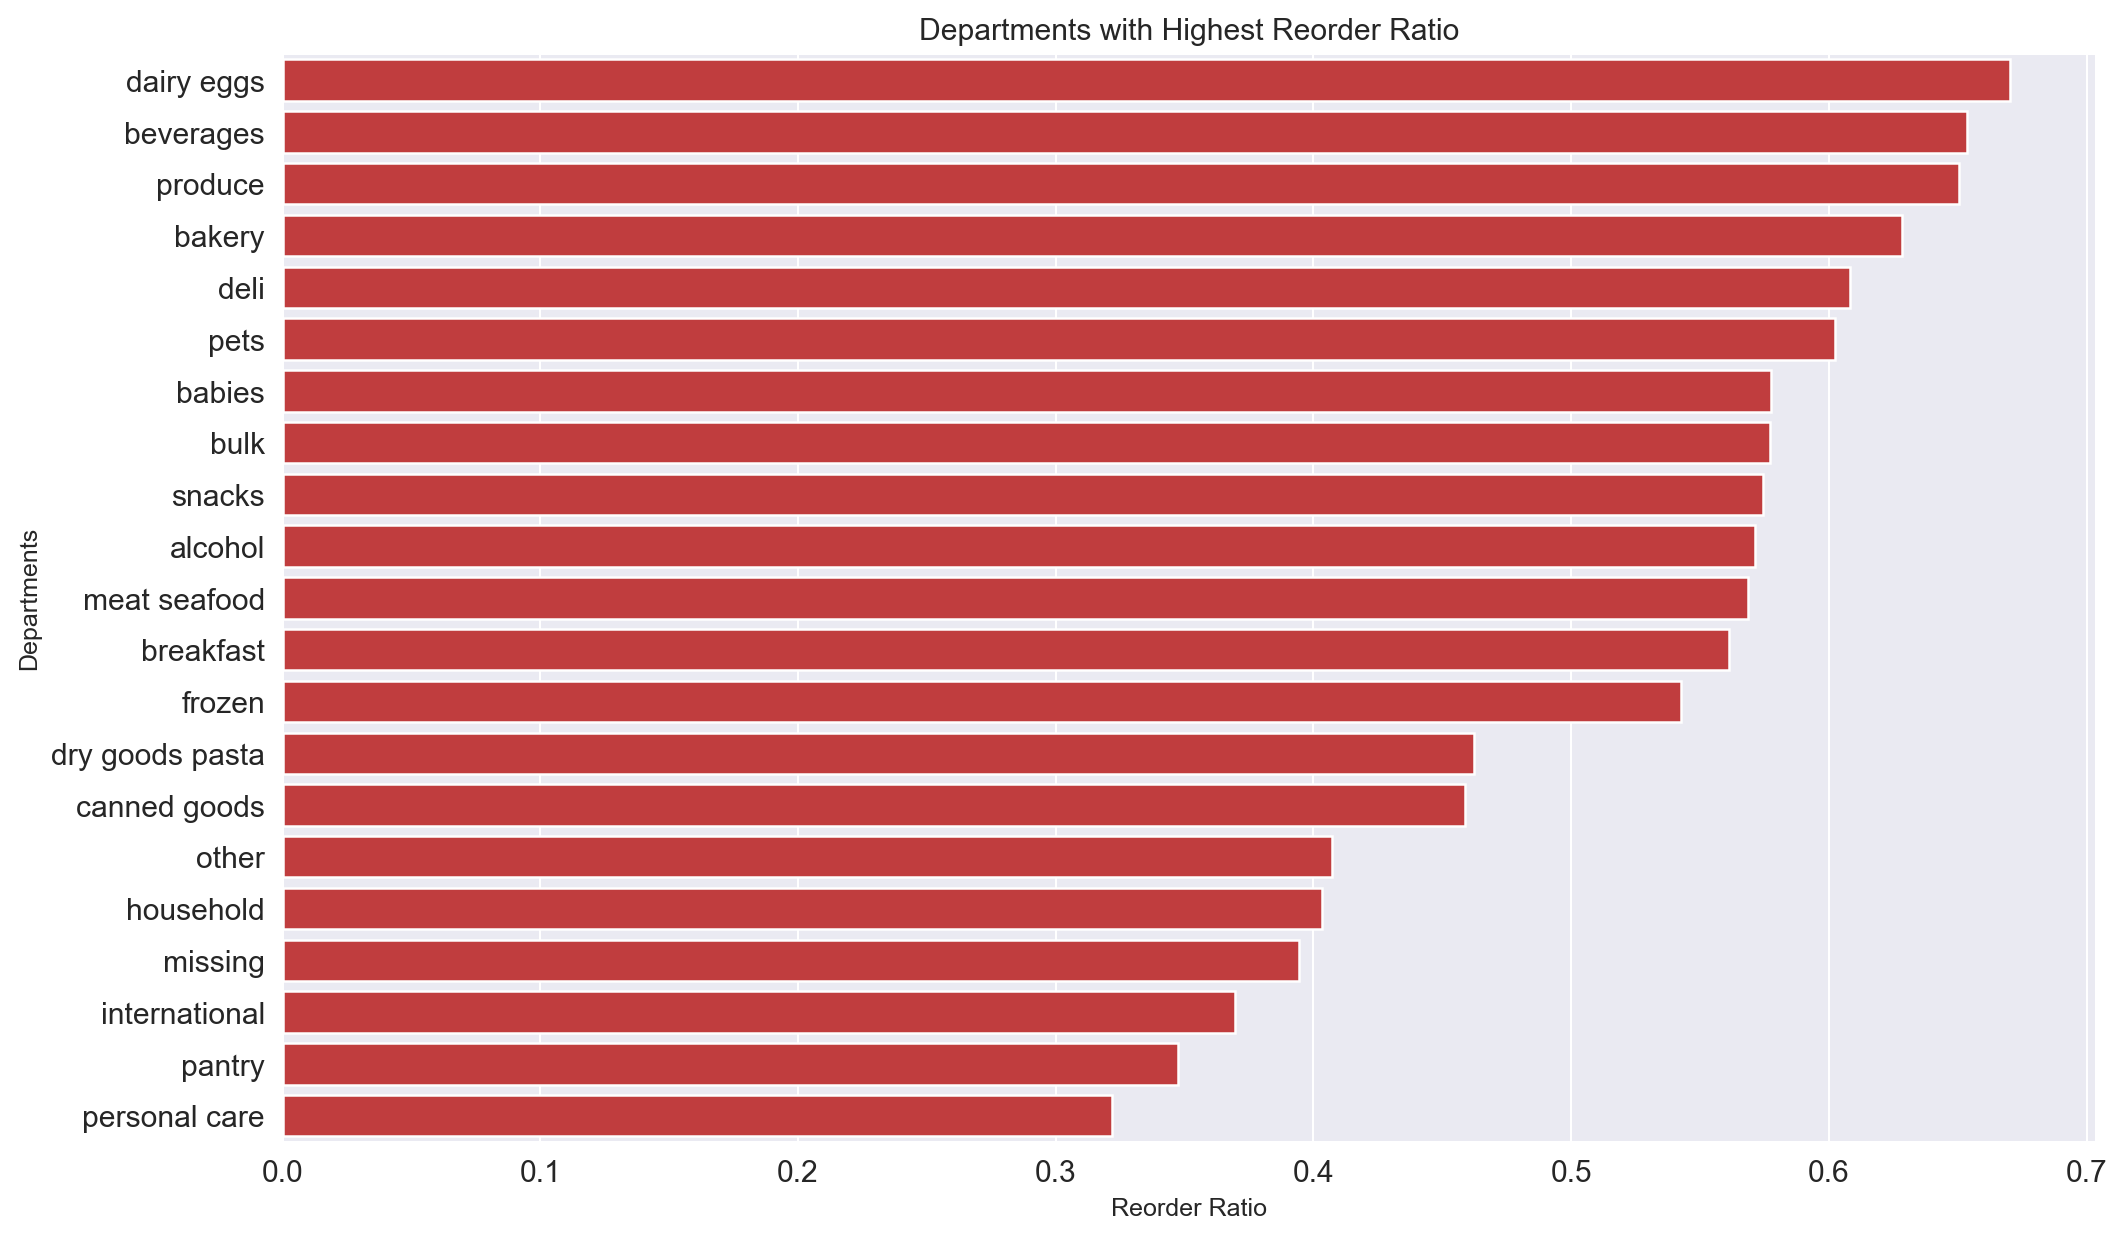

In [19]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = sorted_reorder_dept['department'], x = sorted_reorder_dept['ratio_of_reorder'], color=color[3])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

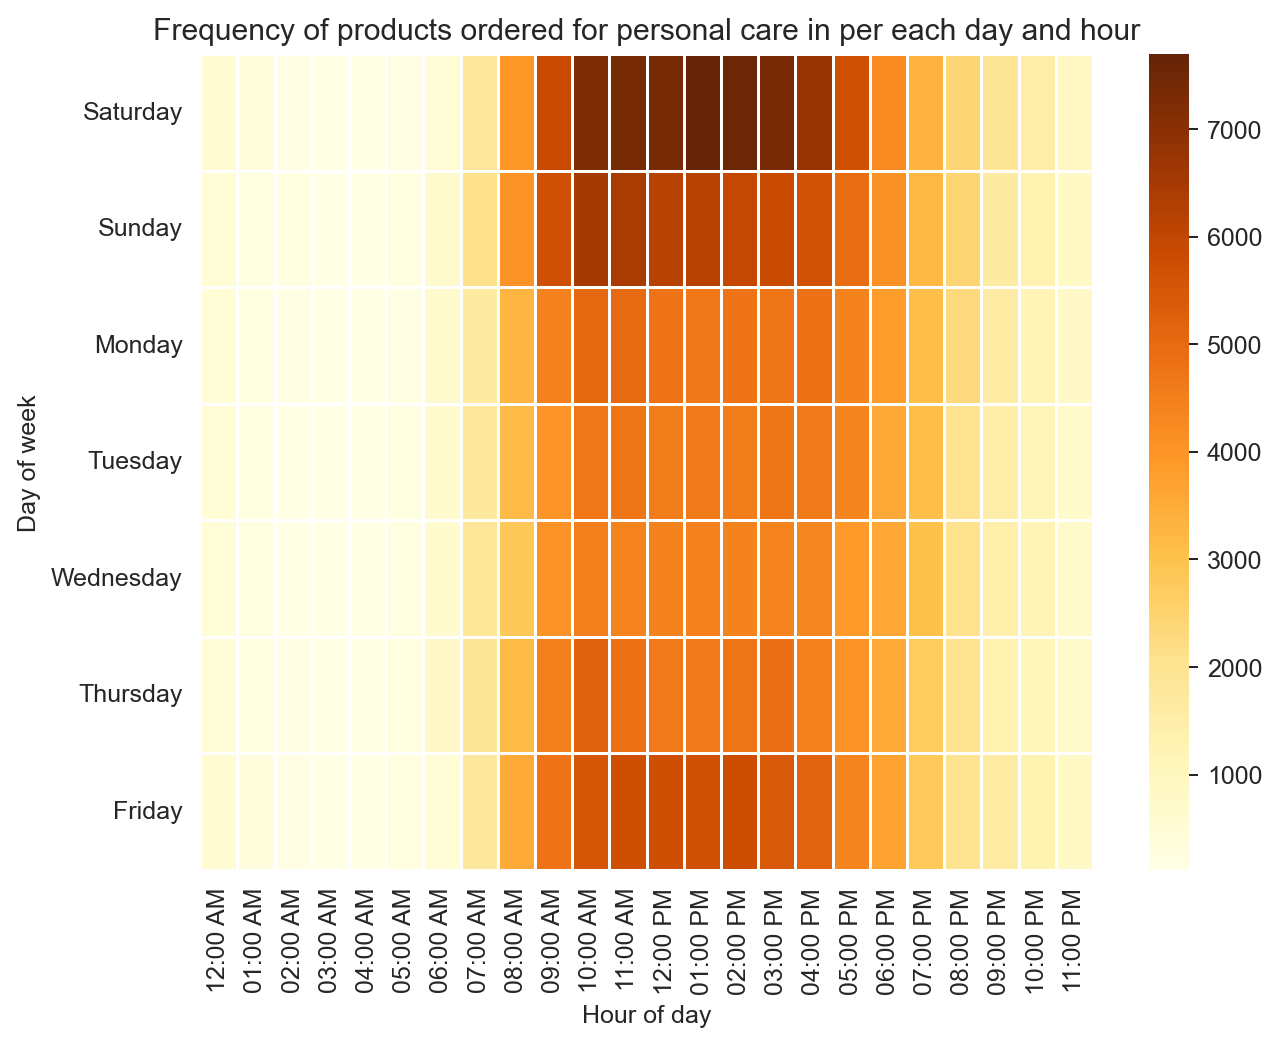

In [20]:

# Take department name as input 
# dep_name = input('Enter the department name you want to generate heatmap for:')
dep_name='personal care'
exists = dep_name in combined_order['department'].unique()

if (exists):
    # Heatmap of the count of orders in each day with each hour
    dep_order_products = combined_order[combined_order['department']==dep_name]
    groupeddf = dep_order_products.groupby(['order_dow', 'order_hour_of_day']).agg('count').reset_index().rename(columns={'order_id':'order_prods_count'})
    heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')

    ax = sns.heatmap(data=heatmap_data, cmap="YlOrBr", linewidths=.5)
    plt.title('Frequency of products ordered for '+dep_name+' in per each day and hour')
    plt.ylabel('Day of week')
    plt.xlabel('Hour of day')
    plt.show()

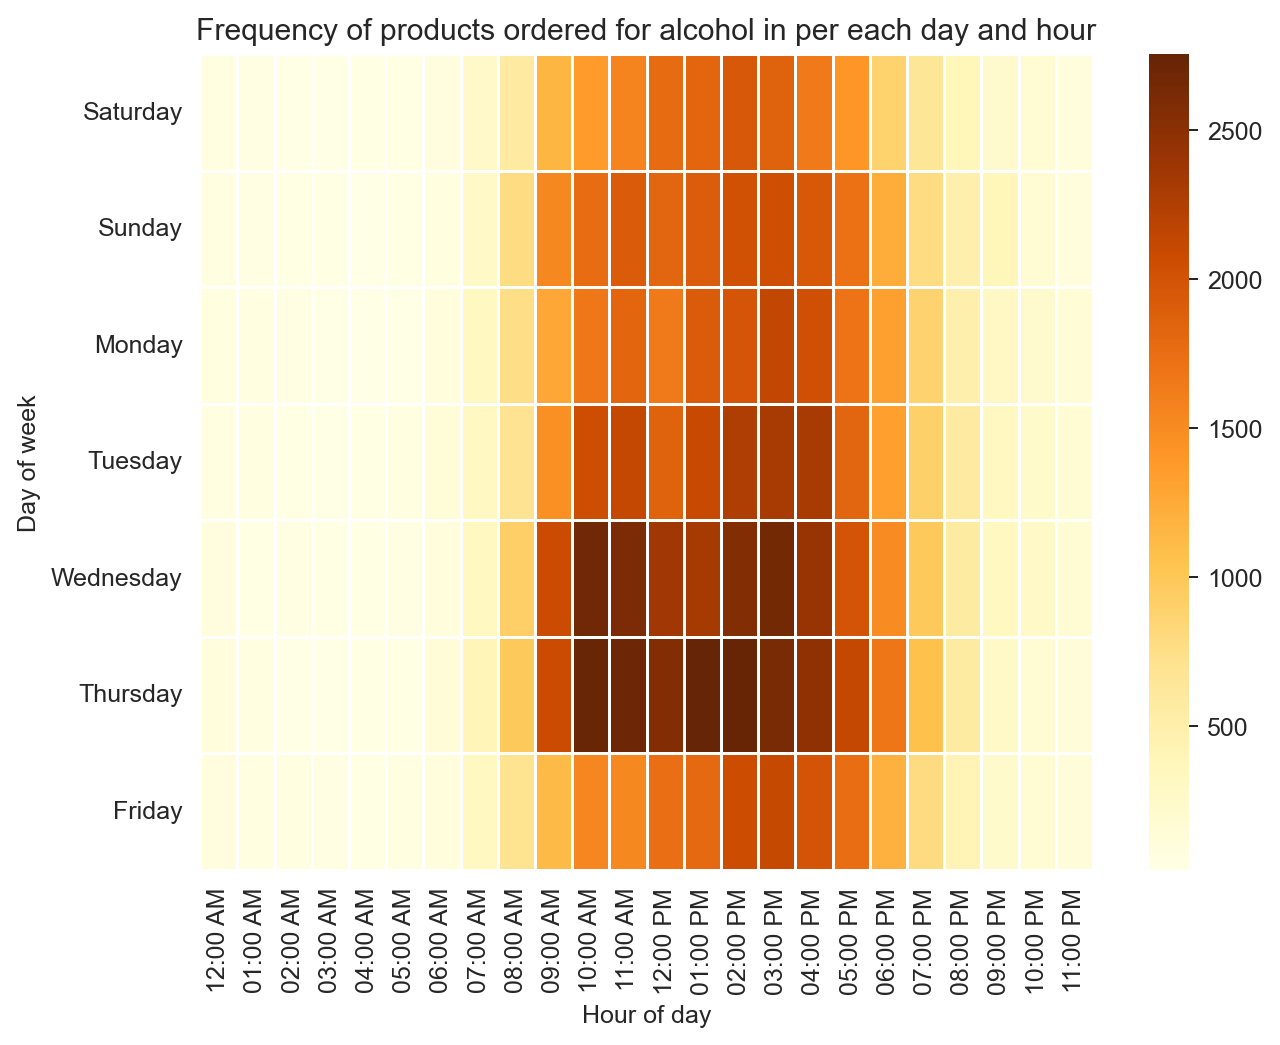

In [21]:

# Take department name as input 
# dep_name = input('Enter the department name you want to generate heatmap for:')
dep_name='alcohol'
exists = dep_name in combined_order['department'].unique()

if (exists):
    # Heatmap of the count of orders in each day with each hour
    dep_order_products = combined_order[combined_order['department']==dep_name]
    groupeddf = dep_order_products.groupby(['order_dow', 'order_hour_of_day']).agg('count').reset_index().rename(columns={'order_id':'order_prods_count'})
    heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')

    ax = sns.heatmap(data=heatmap_data, cmap="YlOrBr", linewidths=.5)
    plt.title('Frequency of products ordered for '+dep_name+' in per each day and hour')
    plt.ylabel('Day of week')
    plt.xlabel('Hour of day')
    plt.show()

## Reorder Analysis by Products

- Which class of products had the most reorder within a given time frame??

In [22]:
total_df = combined_order.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
total_df = total_df.sort_values("total", ascending=False).reset_index()

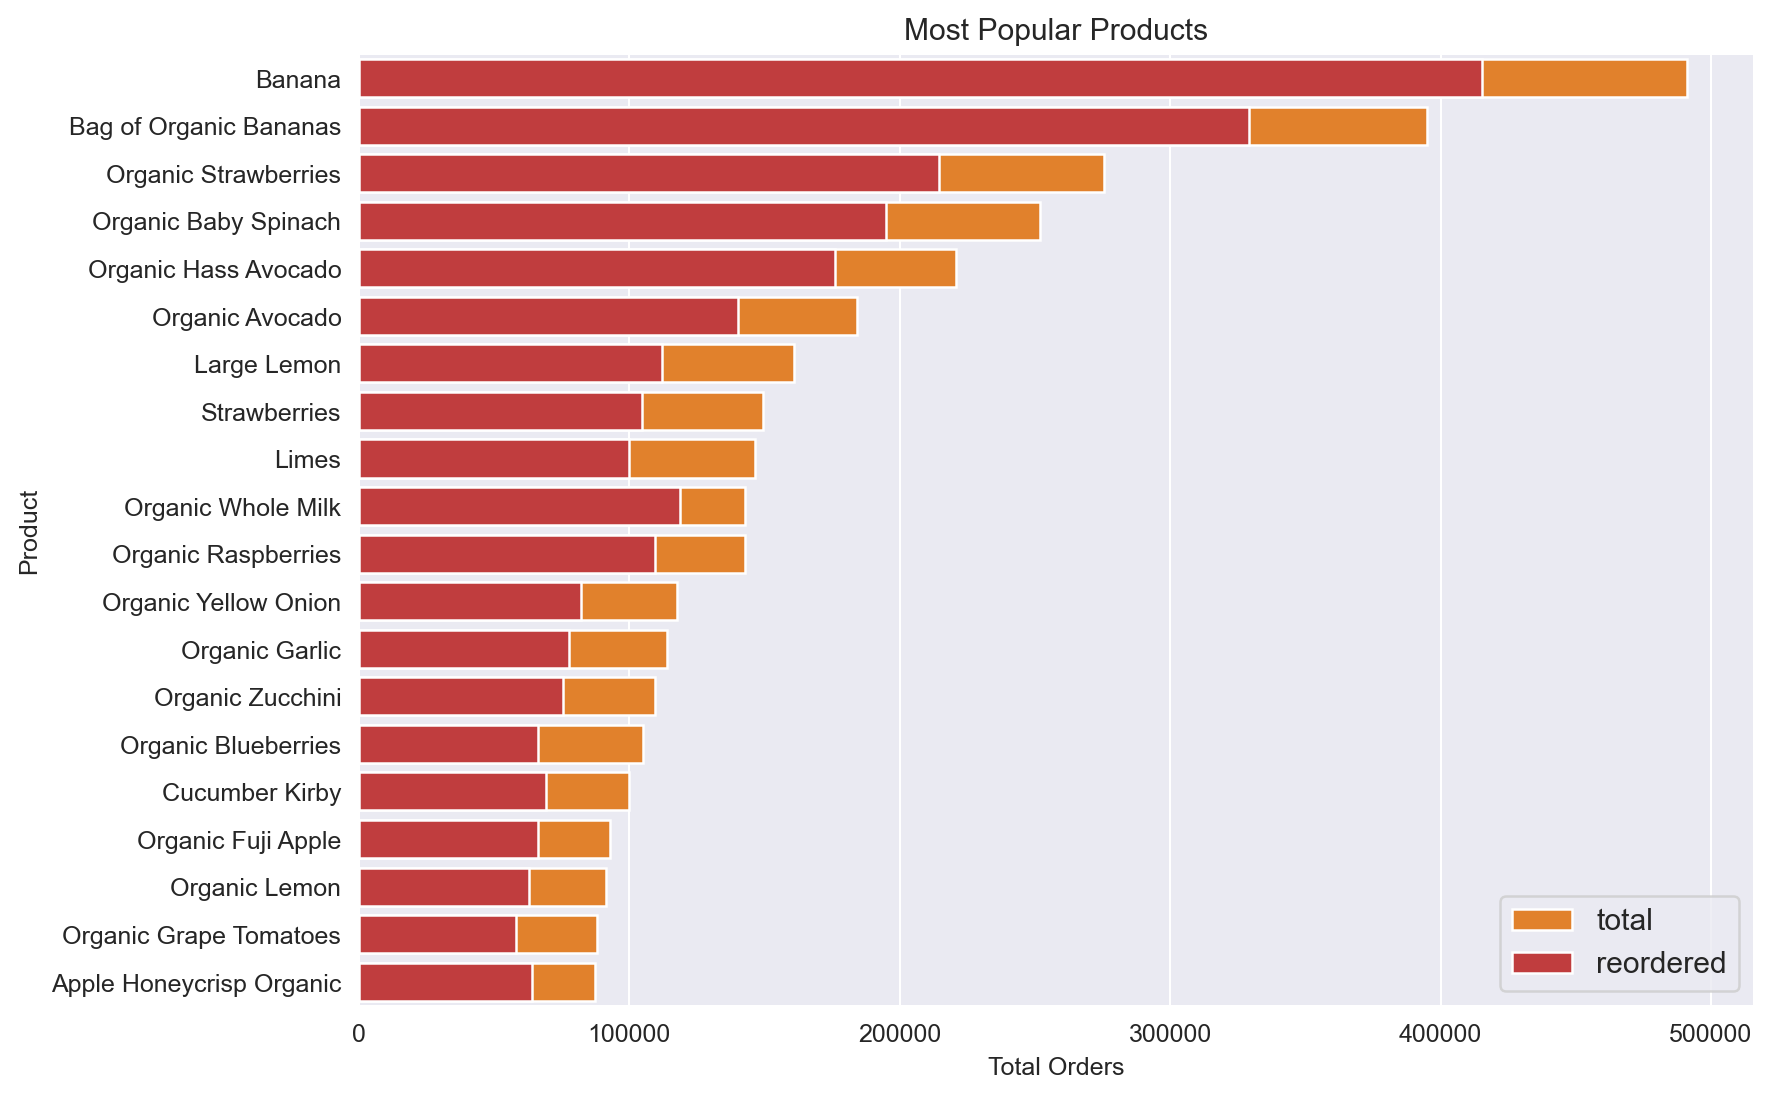

In [23]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = total_df['product_name'][:20], x = total_df['total'][:20], color=color[1], label = "total")
ax = sns.barplot(y = total_df['product_name'][:20], x = total_df['reorders'][:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

**How often a product is purchased?**
- Top 5 Most Ordered Products
    - Banana
    - Bag of Organic Bananas
    - Organic Strawberries
    - Organic Baby Spinach
    - Organic Hass Avocado
- 14% of all orders contains bananas.
- Organic products are frequently ordered.

In [24]:
#Top 10 products with highest reorder ratio
total_df["ratio_of_reorder"] = total_df['reorders']/total_df['total']
total_df.sort_values("ratio_of_reorder", ascending=False).head(10)

,product_name,total,reorders,ratio_of_reorder
23853,Raw Veggie Wrappers,69,65.0,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84.0,0.933333
40147,Orange Energy Shots,13,12.0,0.923077
20296,Chocolate Love Bar,102,94.0,0.921569
30746,Soy Powder Infant Formula,35,32.0,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
35213,"Energy Shot, Grape Flavor",22,20.0,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000
23918,Bars Peanut Butter,69,62.0,0.898551
24218,Soy Crisps Lightly Salted,67,60.0,0.895522


- Product with short consumption lifespan had the highest reorder rate. 
    - For instance overnight pads and sleeping aid are diposable after use. Hence the explained reorder rate.
    - Snacks such as Energy shots, chocolate and utilty items such as vegetable wrapper have high reorder rates.

Let's have a look at the number of customers who buy the products with the highest reorder ratio.

In [25]:
# No of customers who ordered top products with high reorder ratio.
unique_product_users = combined_order.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
unique_product_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [26]:
unique_product_users = unique_product_users.merge(total_df, on='product_name', how='left')
unique_product_users.sort_values("ratio_of_reorder", ascending=False).head(10)

,product_name,total_users,total,reorders,ratio_of_reorder
37379,Raw Veggie Wrappers,4,69,65.0,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84.0,0.933333
28415,Orange Energy Shots,1,13,12.0,0.923077
8537,Chocolate Love Bar,8,102,94.0,0.921569
41723,Soy Powder Infant Formula,3,35,32.0,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41.0,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20.0,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27.0,0.900000
3832,Bars Peanut Butter,7,69,62.0,0.898551
41712,Soy Crisps Lightly Salted,7,67,60.0,0.895522


#### Total Product Orders VS Total Unique Product Buyers

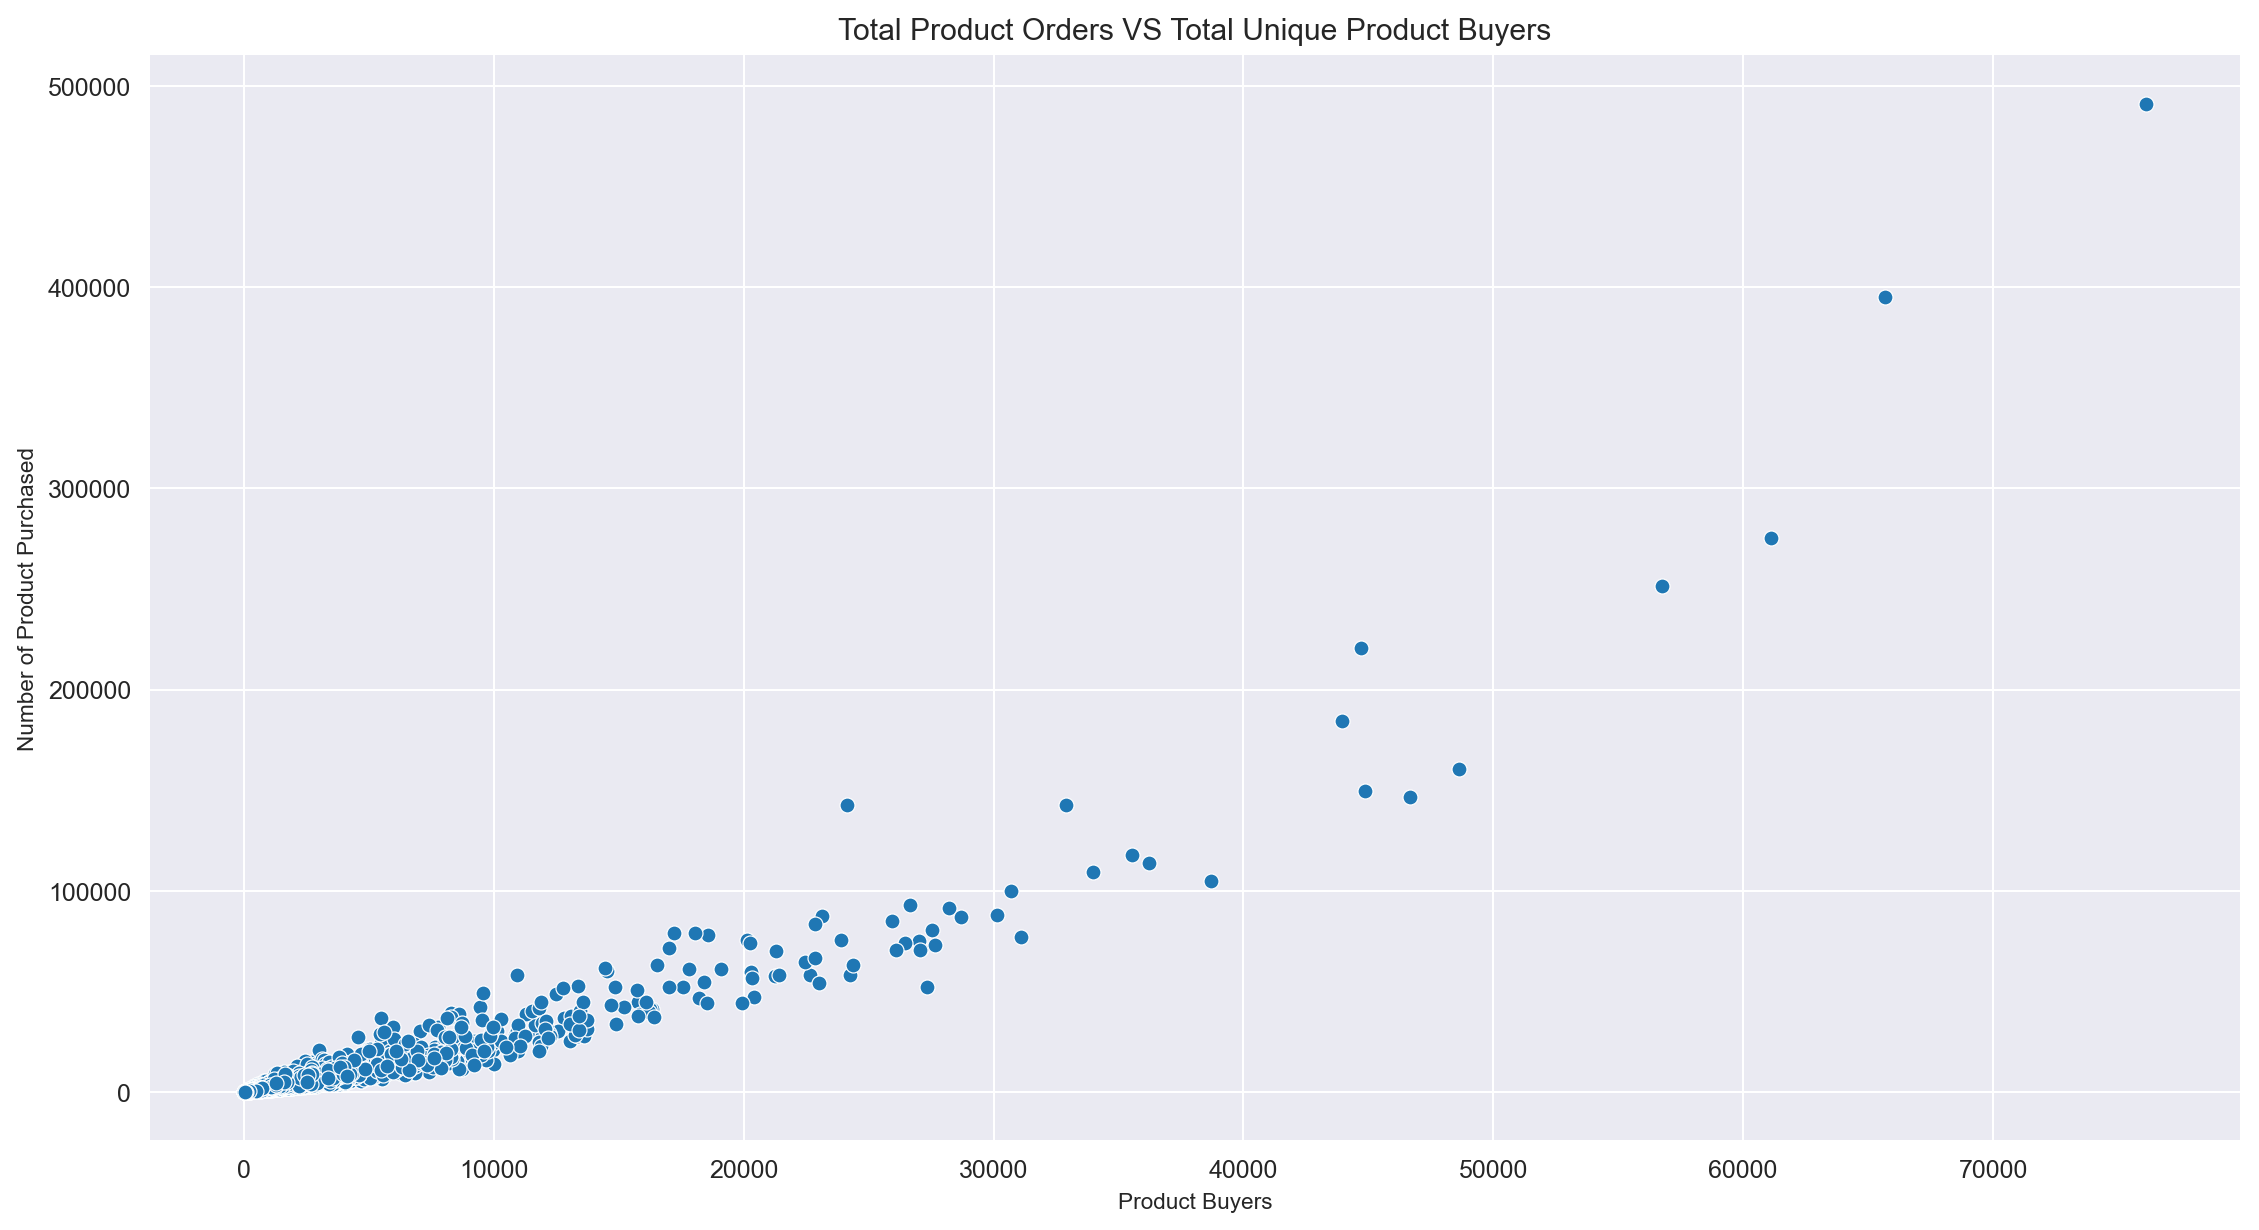

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = unique_product_users['total'], x = unique_product_users['total_users'])
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

- A strong positive correlation exists between the total number of product ordered and the unique purchasing customers.

#### Reorder Percentage VS Total Orders

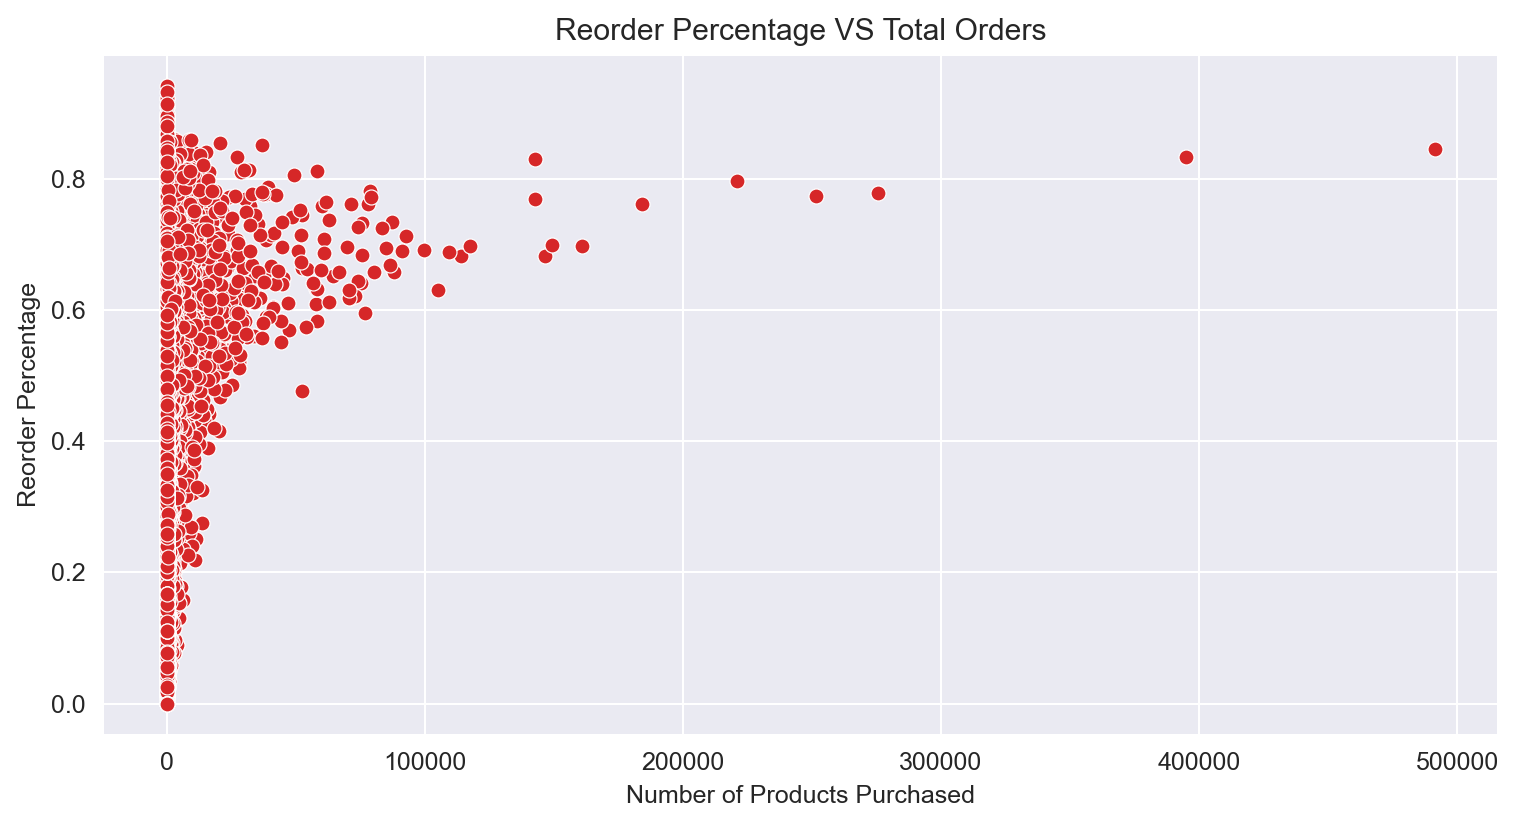

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = unique_product_users['total'], y = unique_product_users['ratio_of_reorder'], color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

- Weak positive correlation between reorder percentage and total number of product purchased.

#### Reorder Percentage VS Total Unique Users

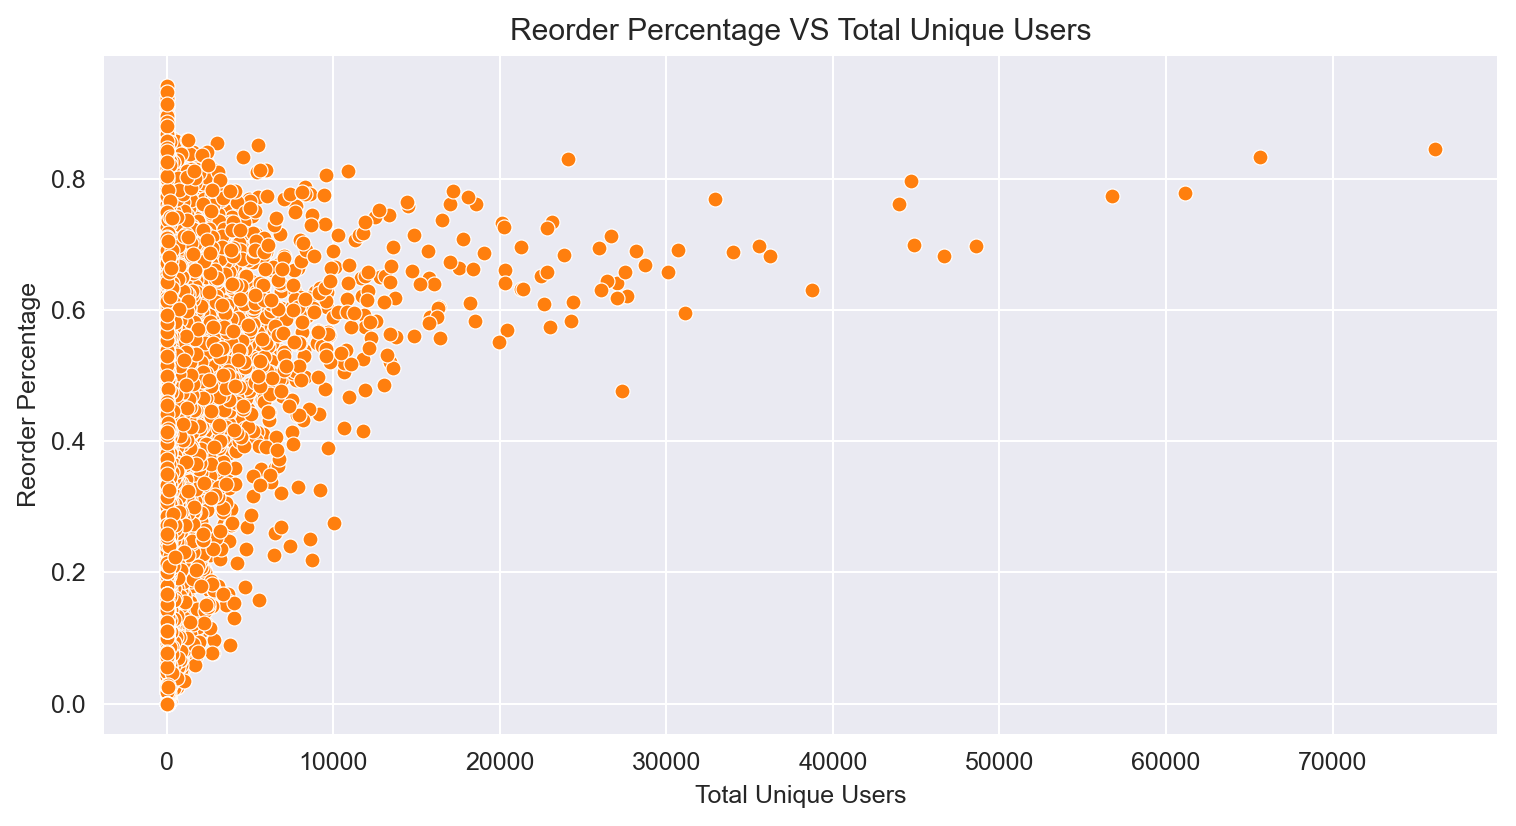

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = unique_product_users['total_users'], y = unique_product_users['ratio_of_reorder'], color = color[1])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

- Weak positive correlation between reorder percentage and total number of unique customers

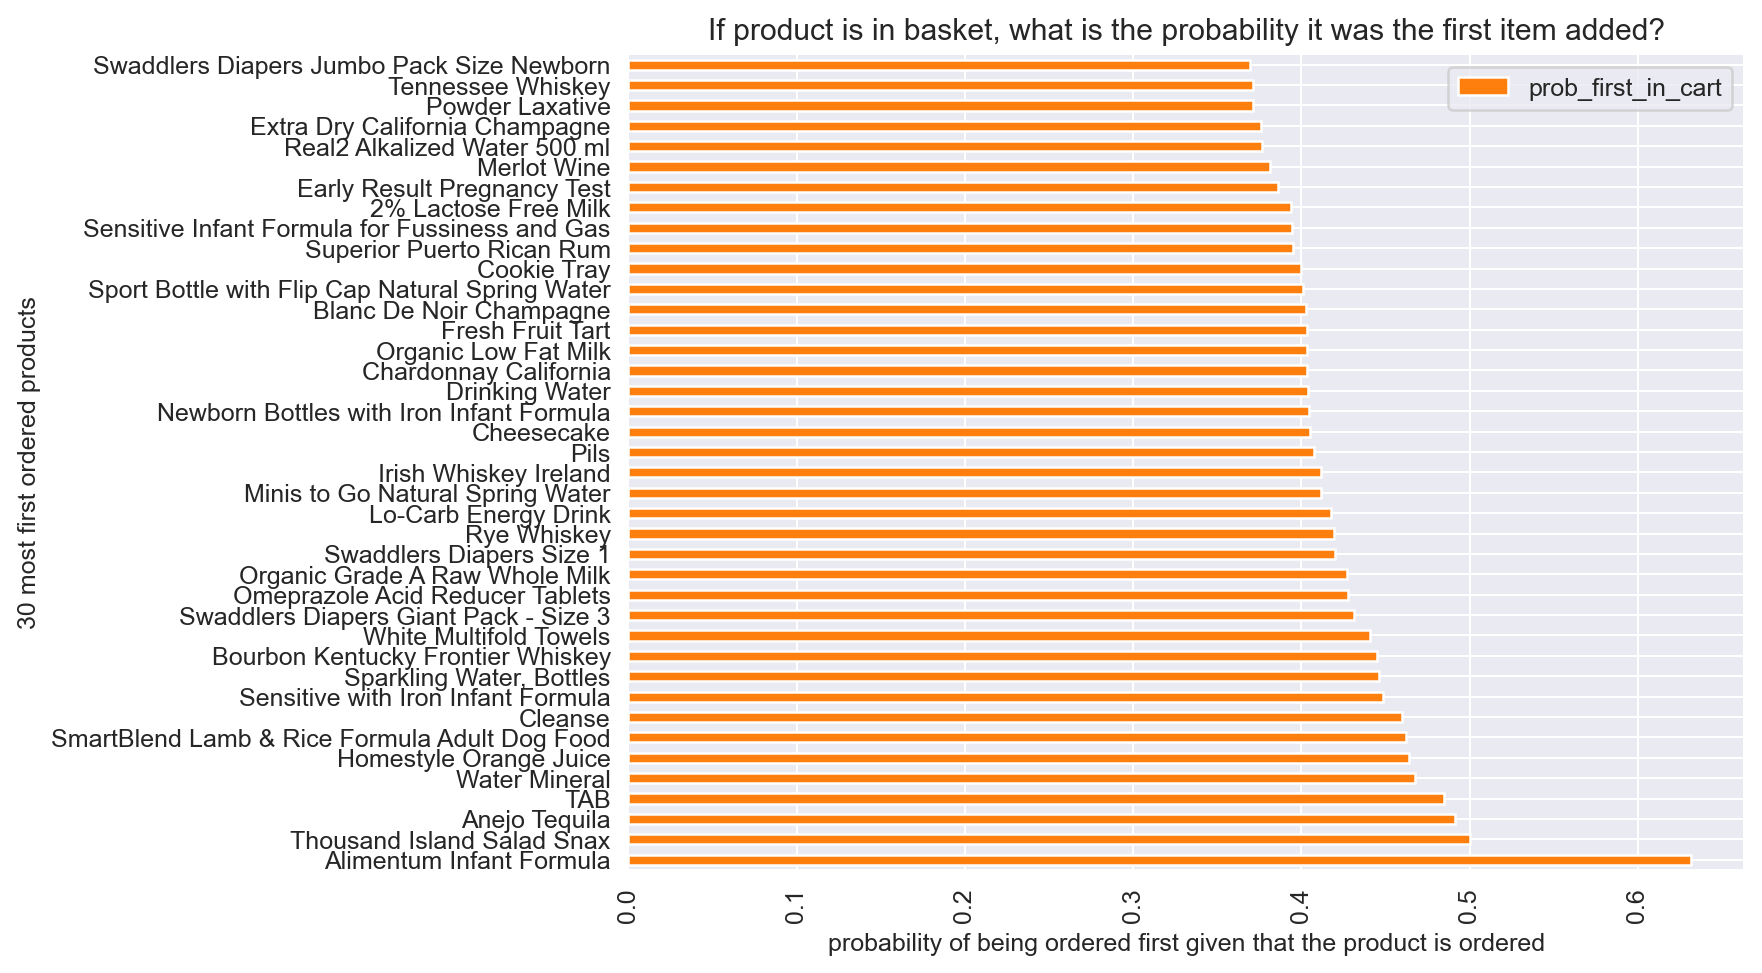

In [34]:
# Sorting Products by the count of times they appeared first in cart.
combined_order['is_first_in_cart'] = combined_order['add_to_cart_order'] == 1
groupeddf = combined_order.groupby(['product_name'], as_index = False).agg({'is_first_in_cart': 'mean', 'order_id': 'count'}).rename(columns={'is_first_in_cart':'prob_first_in_cart', 'order_id':'orders_count'})
confident_products_mask = groupeddf['orders_count'] > 100
groupeddf = groupeddf[confident_products_mask].sort_values(by='prob_first_in_cart', ascending=False)

# Ploting the Percentage of being ordered first for the 30 most first ordered products.
groupeddf.iloc[:40].plot.barh(x='product_name', y='prob_first_in_cart',color=color[1])
plt.ylabel('30 most first ordered products')
plt.xlabel('probability of being ordered first given that the product is ordered')
plt.title('If product is in basket, what is the probability it was the first item added?')
plt.xticks(rotation=90)
plt.show()

del confident_products_mask

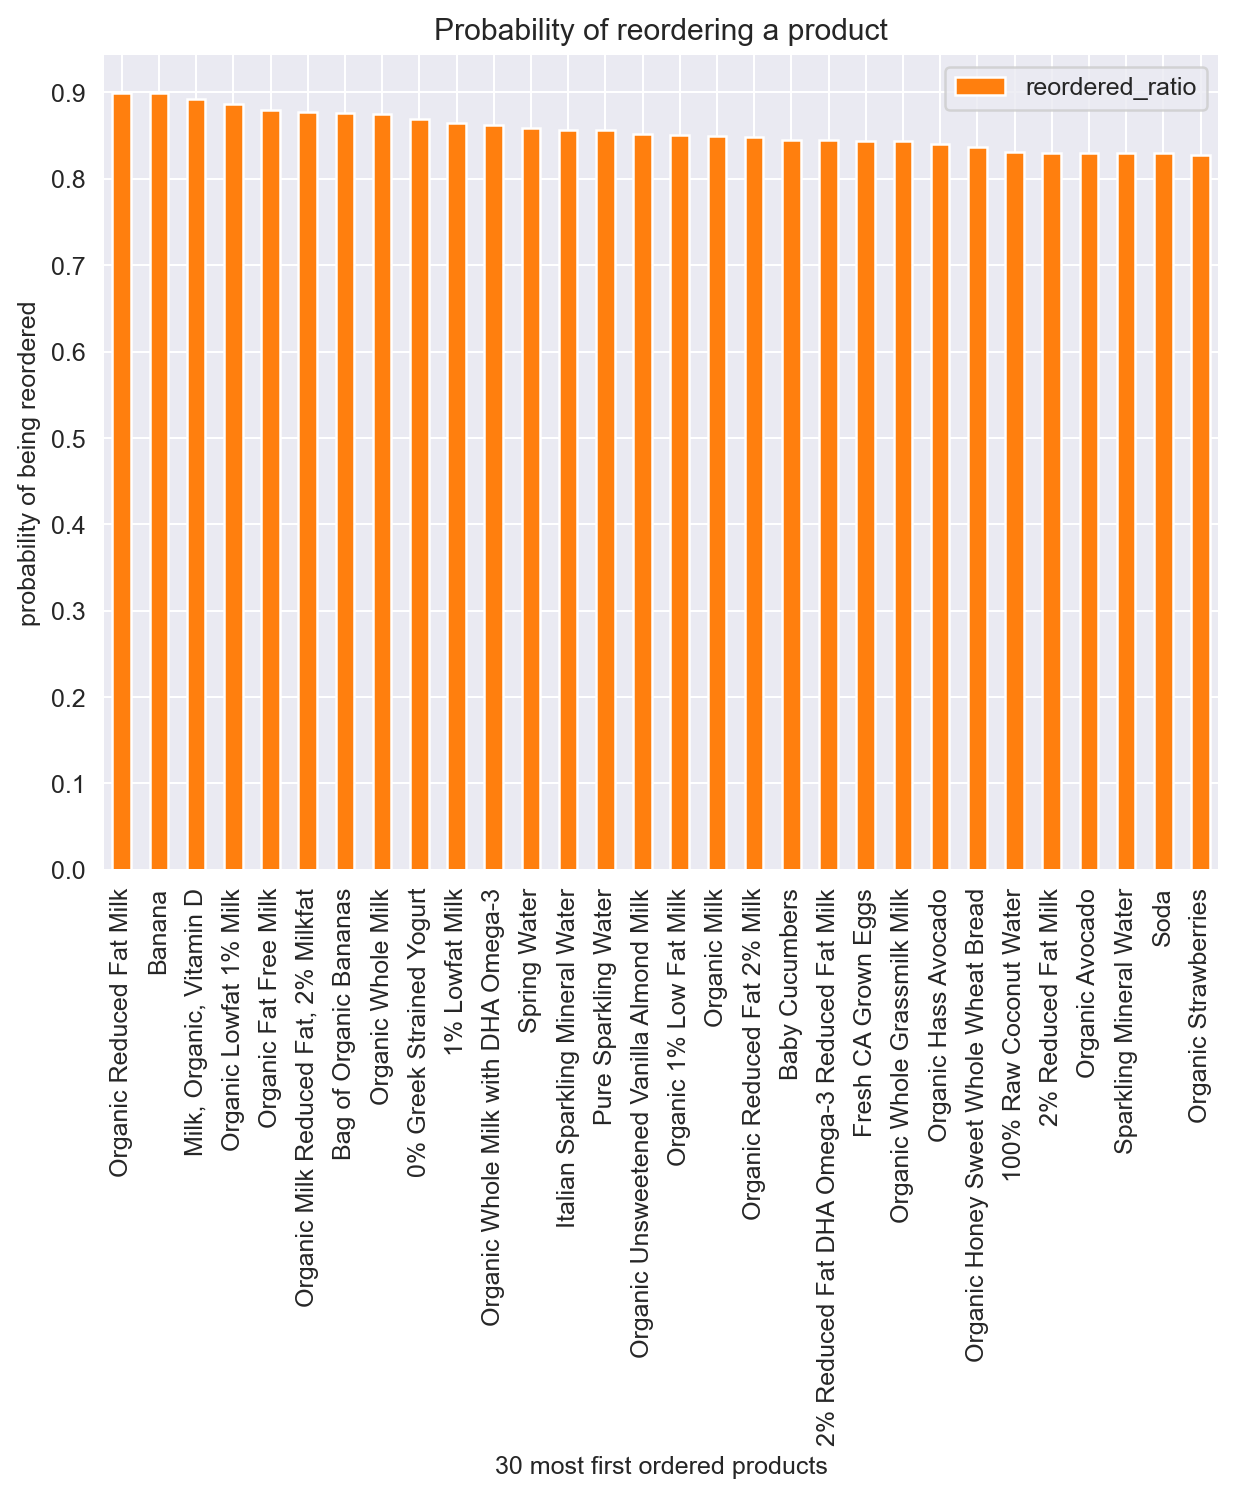

Count of total Organic Reduced Fat Milk purchases: (36869, 17)
Count of reordered Organic Reduced Fat Milk purchases: (31394, 17)


In [36]:
# For each product what is its probability to be reordered.
# We don't consider the first order of the user because 100% it won't contain any prev. ordered products.
non_first_orders_Mask = combined_order['order_number'] != 1
groupeddf = combined_order[non_first_orders_Mask].groupby('product_name').agg({'order_id':'count','reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio', 'order_id':'orders_count'})

# Filter products under 10000 order count
groupeddf = groupeddf[groupeddf['orders_count']>10000]
# Sort by the products having highest prob to be reordered
groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)

ax = groupeddf.iloc[:30].plot.bar(x='product_name', y='reordered_ratio',color=color[1])
plt.xlabel('30 most first ordered products')
plt.ylabel('probability of being reordered')
plt.xticks(rotation=90)
plt.title('Probability of reordering a product')
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
plt.show()

organic_reduced_fat_milk_purchases_mask = combined_order['product_name']=='Organic Reduced Fat Milk'
organic_reduced_fat_milk_non_first_purchases_mask = organic_reduced_fat_milk_purchases_mask & combined_order['reordered']==1
print(f'Count of total Organic Reduced Fat Milk purchases: {combined_order[organic_reduced_fat_milk_purchases_mask].shape}')
print(f'Count of reordered Organic Reduced Fat Milk purchases: {combined_order[organic_reduced_fat_milk_non_first_purchases_mask].shape}')

- **Inference:**
    - 10% of instacart's products are organic products
    - 31.5% of bought products are organic products
    - 67% probability of reordering an organic products.
    - 61% probability of reordering an non-organic products.
    - No significance pattern of when organic products are bought most, than when products in general are bought most.

### Organic Vs Inorganic Product Analysis

In [37]:
unique_product_users['Organic'] = unique_product_users['product_name'].str.contains("Organic")
unique_product_users.head()

,product_name,total_users,total,reorders,ratio_of_reorder,Organic
0,#2 Coffee Filters,534,799,265.0,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3.0,0.214286,False
2,#2 Mechanical Pencils,9,9,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90.0,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93.0,0.534483,False


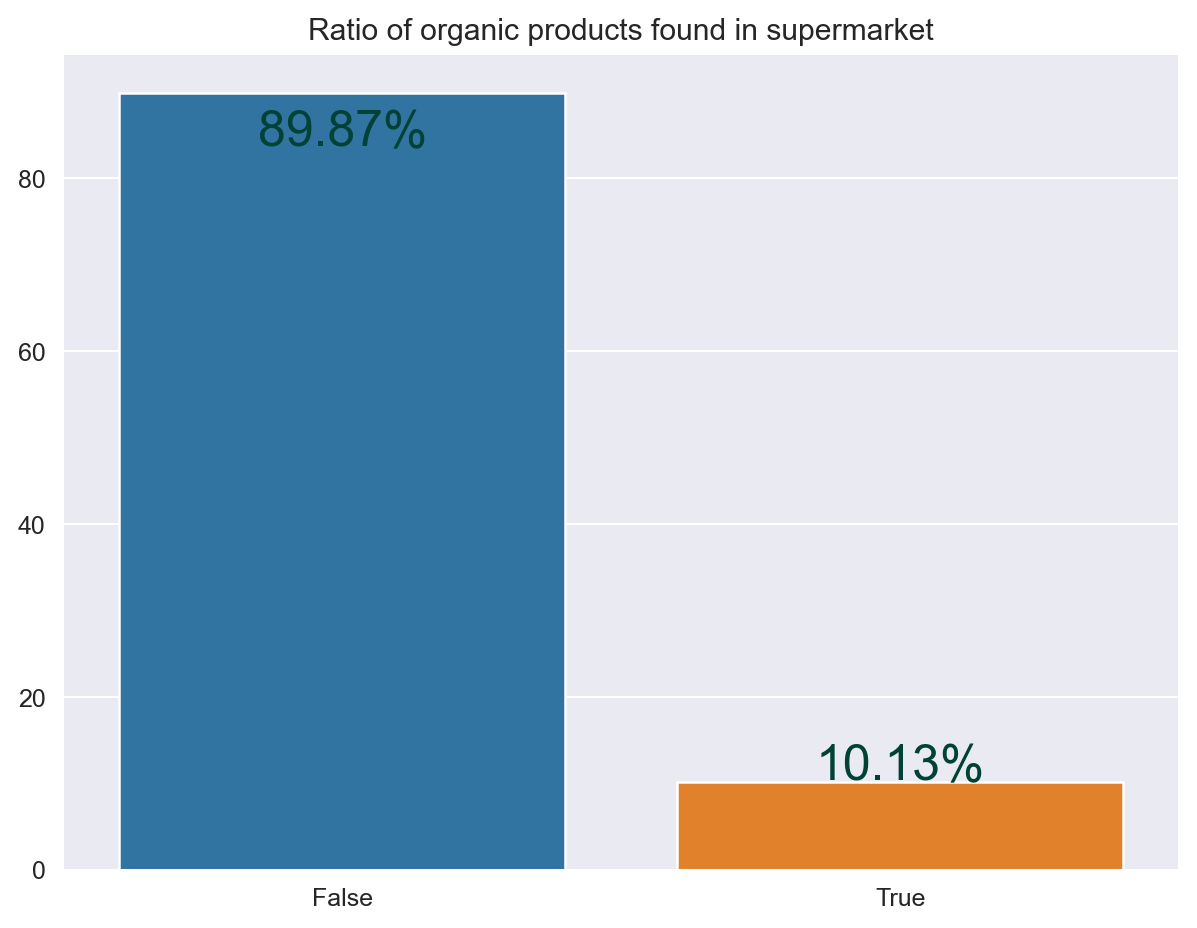

In [38]:
# Ratio of organic products found in supermarket
total_order_products_count = unique_product_users.shape[0]
organic_ratio = unique_product_users['Organic'].value_counts()/total_order_products_count*100
ax = sns.barplot(x= organic_ratio.index, y=organic_ratio.values, palette=color)
annotate_text(ax)
plt.title('Ratio of organic products found in supermarket')
plt.show()

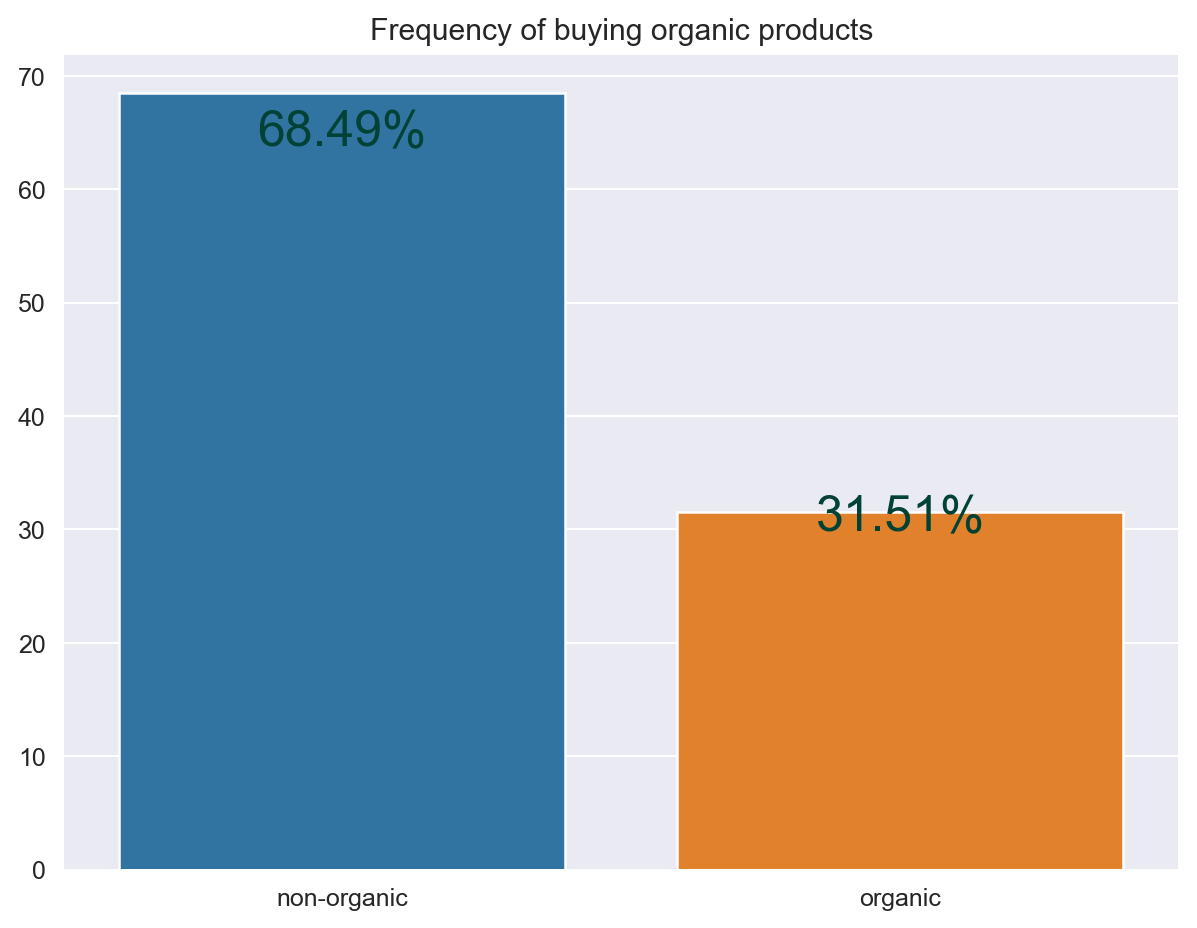

In [39]:
# Frequency of buying organic products
total_products_count = combined_order.shape[0]
organic_freq = combined_order['is_organic'].value_counts()/total_products_count*100
ax = sns.barplot(x= organic_freq.index, y=organic_freq.values, palette=color)
ax.set_xticklabels(['non-organic', 'organic'])
annotate_text(ax)
plt.title('Frequency of buying organic products')
plt.show()

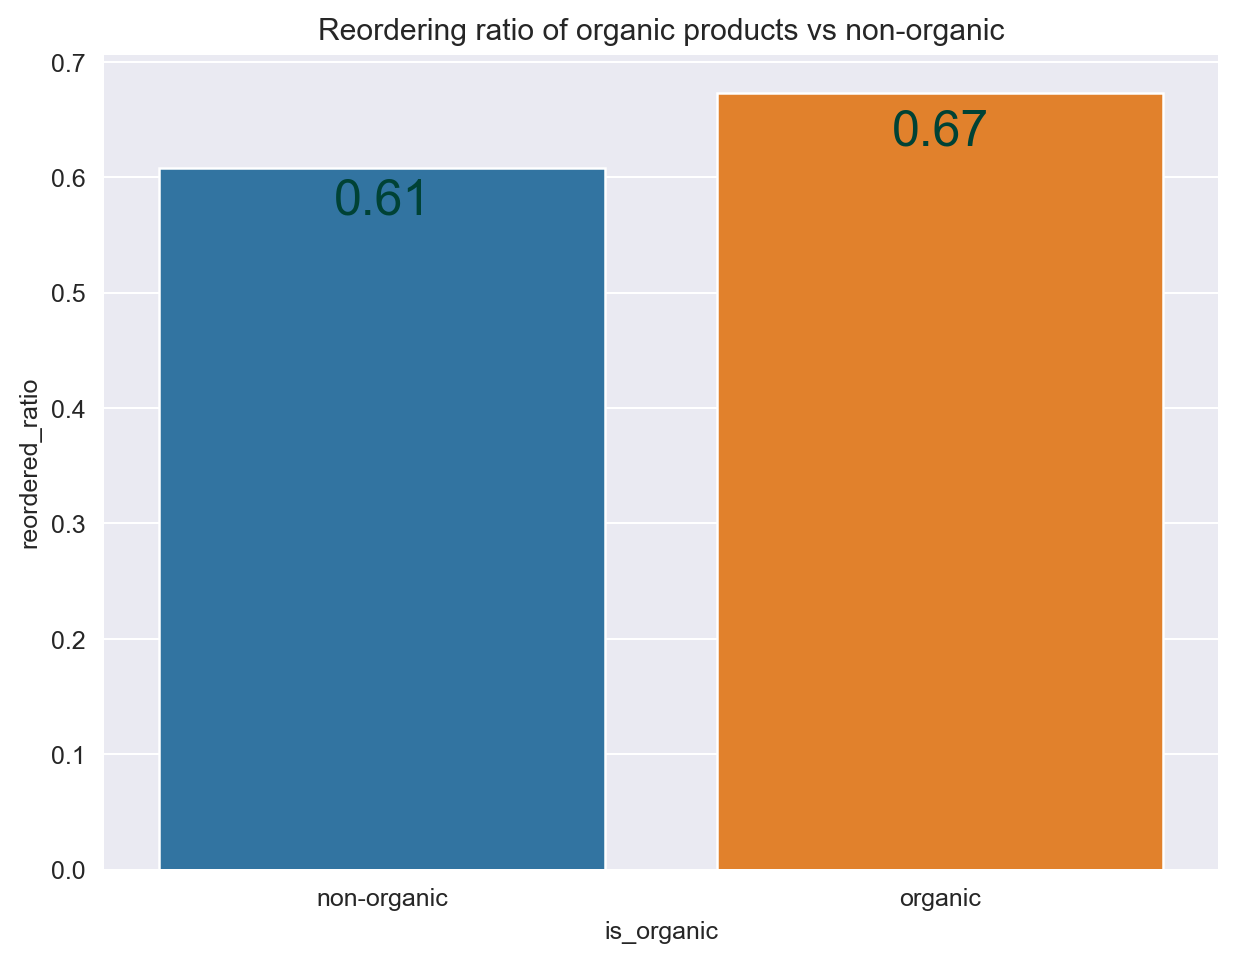

In [40]:
# Reordering ratio of organic products vs non-organic
non_first_orders_mask = combined_order['order_number'] != 1
groupeddf = combined_order[non_first_orders_mask].groupby(['is_organic']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
ax = sns.barplot(x='is_organic', y='reordered_ratio', data=groupeddf, palette=color)
annotate_text(ax, append_to_text='')
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Reordering ratio of organic products vs non-organic')
plt.show()

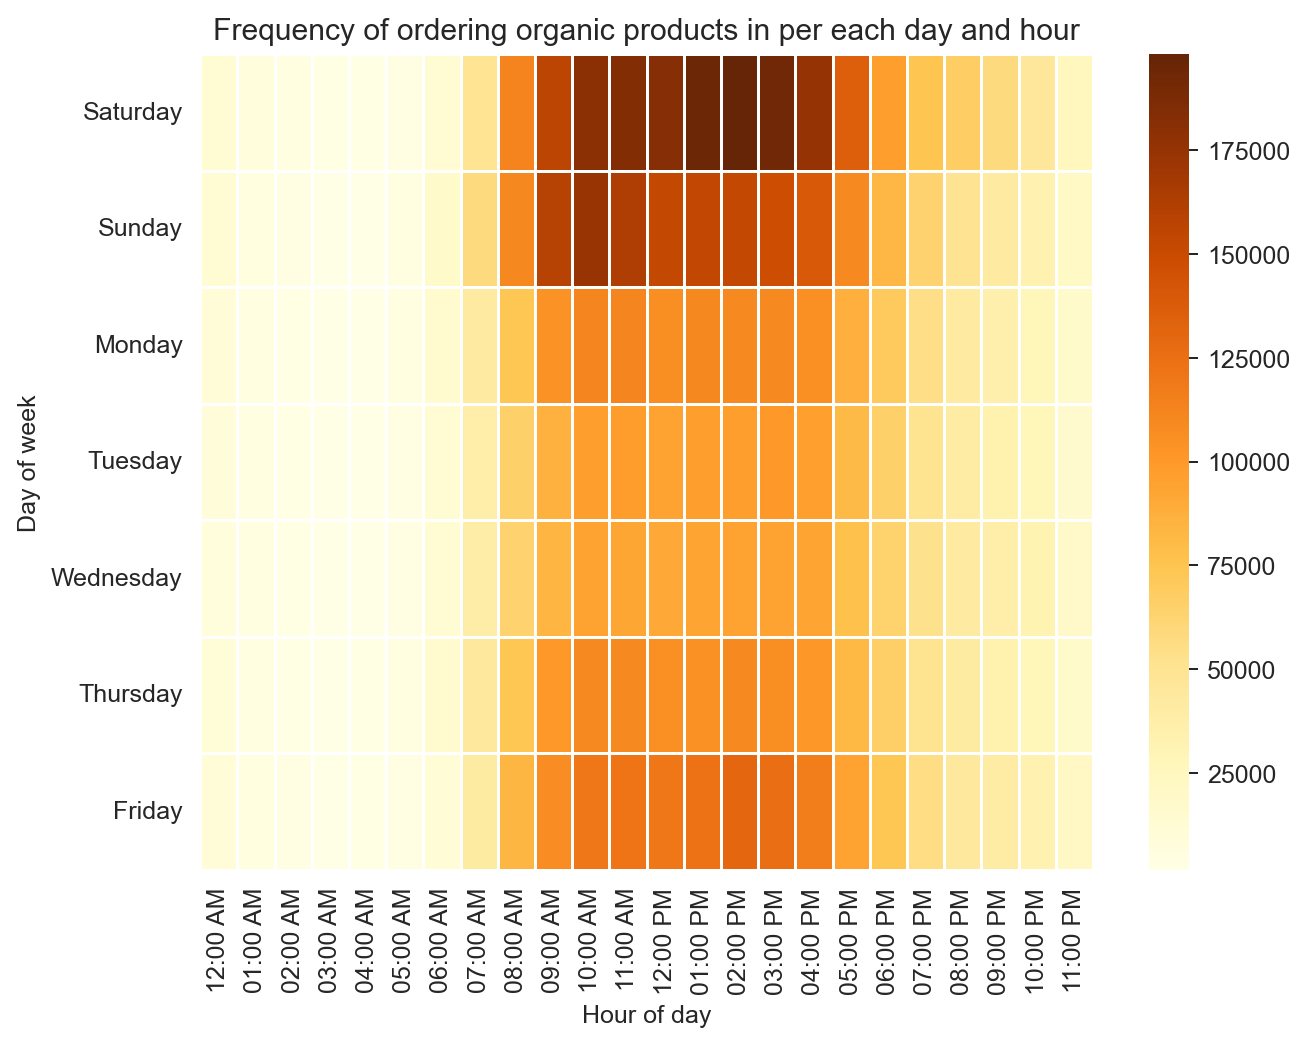

In [41]:
# Heatmap of the count of ordering organic products in each day with each hour
groupeddf = combined_order.groupby(['order_dow', 'order_hour_of_day'])['is_organic'].agg('sum').reset_index().rename(columns={'is_organic':'organic_products_count'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'organic_products_count')

ax = sns.heatmap(data=heatmap_data, cmap="YlOrBr", linewidths=.5)
plt.title('Frequency of ordering organic products in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

- There are more inorganic products than there are organic in the grocery store.

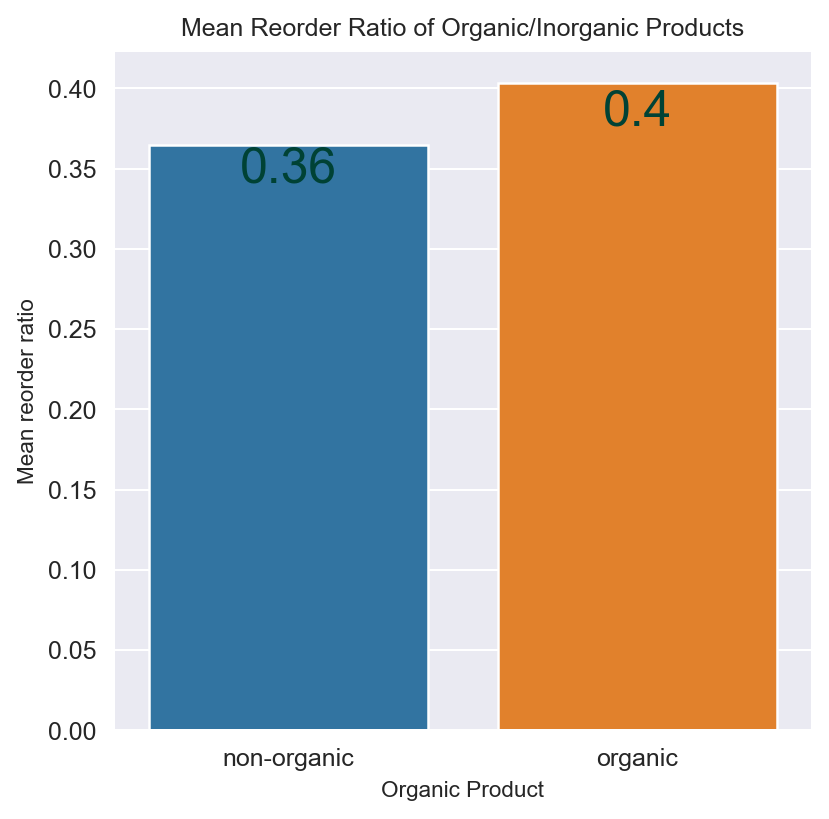

In [42]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = unique_product_users.groupby('Organic')['ratio_of_reorder'].mean().index, y = unique_product_users.groupby('Organic')['ratio_of_reorder'].mean().values)
annotate_text(ax, append_to_text='')
ax.set_xticklabels(['non-organic', 'organic'])
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

- Generally, organic products have a higher reorder rate as compared to their inorganic counterparts. But only by a slight margin.
- There are no strong evidences to support high reorder rates using the organic content of grocery products.

#### Add to Cart Order VS Reorder  

In [43]:
cart_df = combined_order.groupby('add_to_cart_order')['reordered'].mean().reset_index()
cart_df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


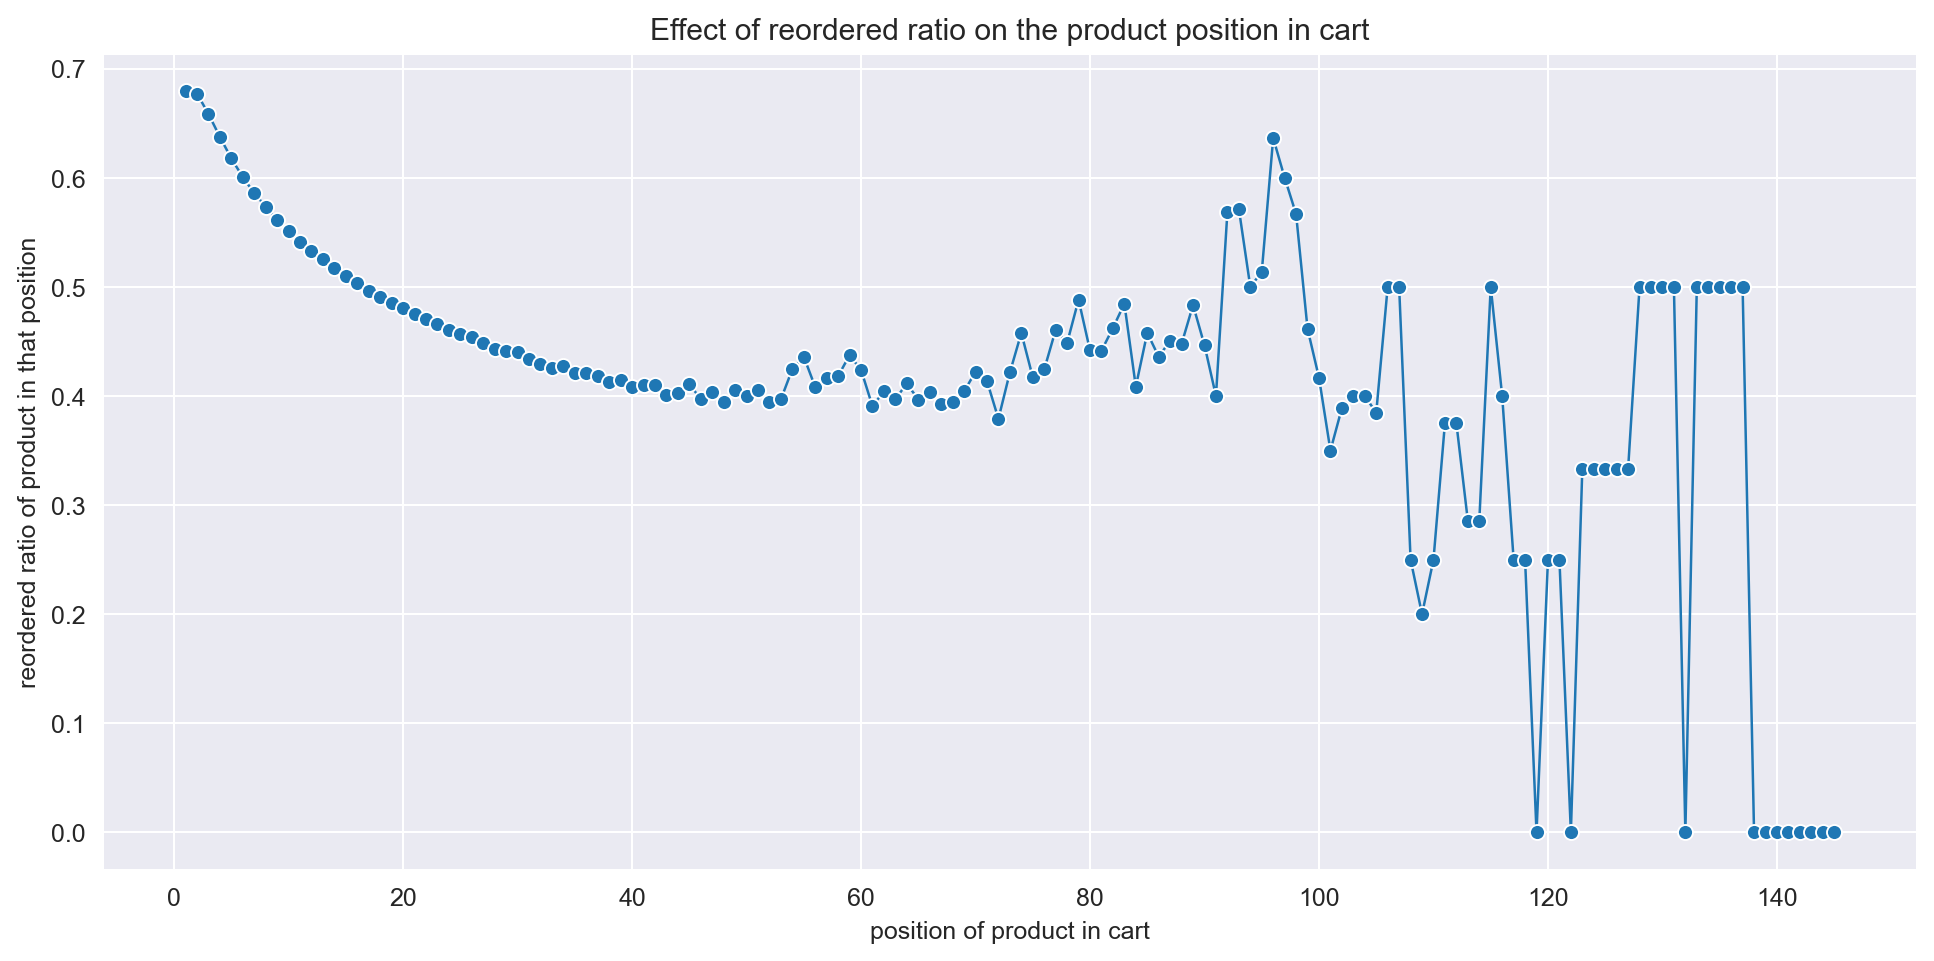

In [44]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=cart_df['add_to_cart_order'], y=cart_df['reordered'], lw = 1, marker='o')
ax.set_xlabel("position of product in cart")
ax.set_ylabel("reordered ratio of product in that position")
ax.set_title("Effect of reordered ratio on the product position in cart")
plt.show()

**Analyzing the count of reordered products in a basket**

- Most baskets have from 0-5 reordered product
- Probability of a basket having 0 reordered products: 11.868056
- Probability of a basket having 1 reordered products: 10.262626
- Probability of a basket having 2 reordered products: 10.326791
- Probability of a basket having 3 reordered products: 9.735981
- Probability of a basket having 4 reordered products: 8.777965

#### Most Popular Products on different days

In [45]:
popular_df = combined_order.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
popular_df = popular_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
popular_df = popular_df.groupby('order_dow').head(5).reset_index(drop = True)

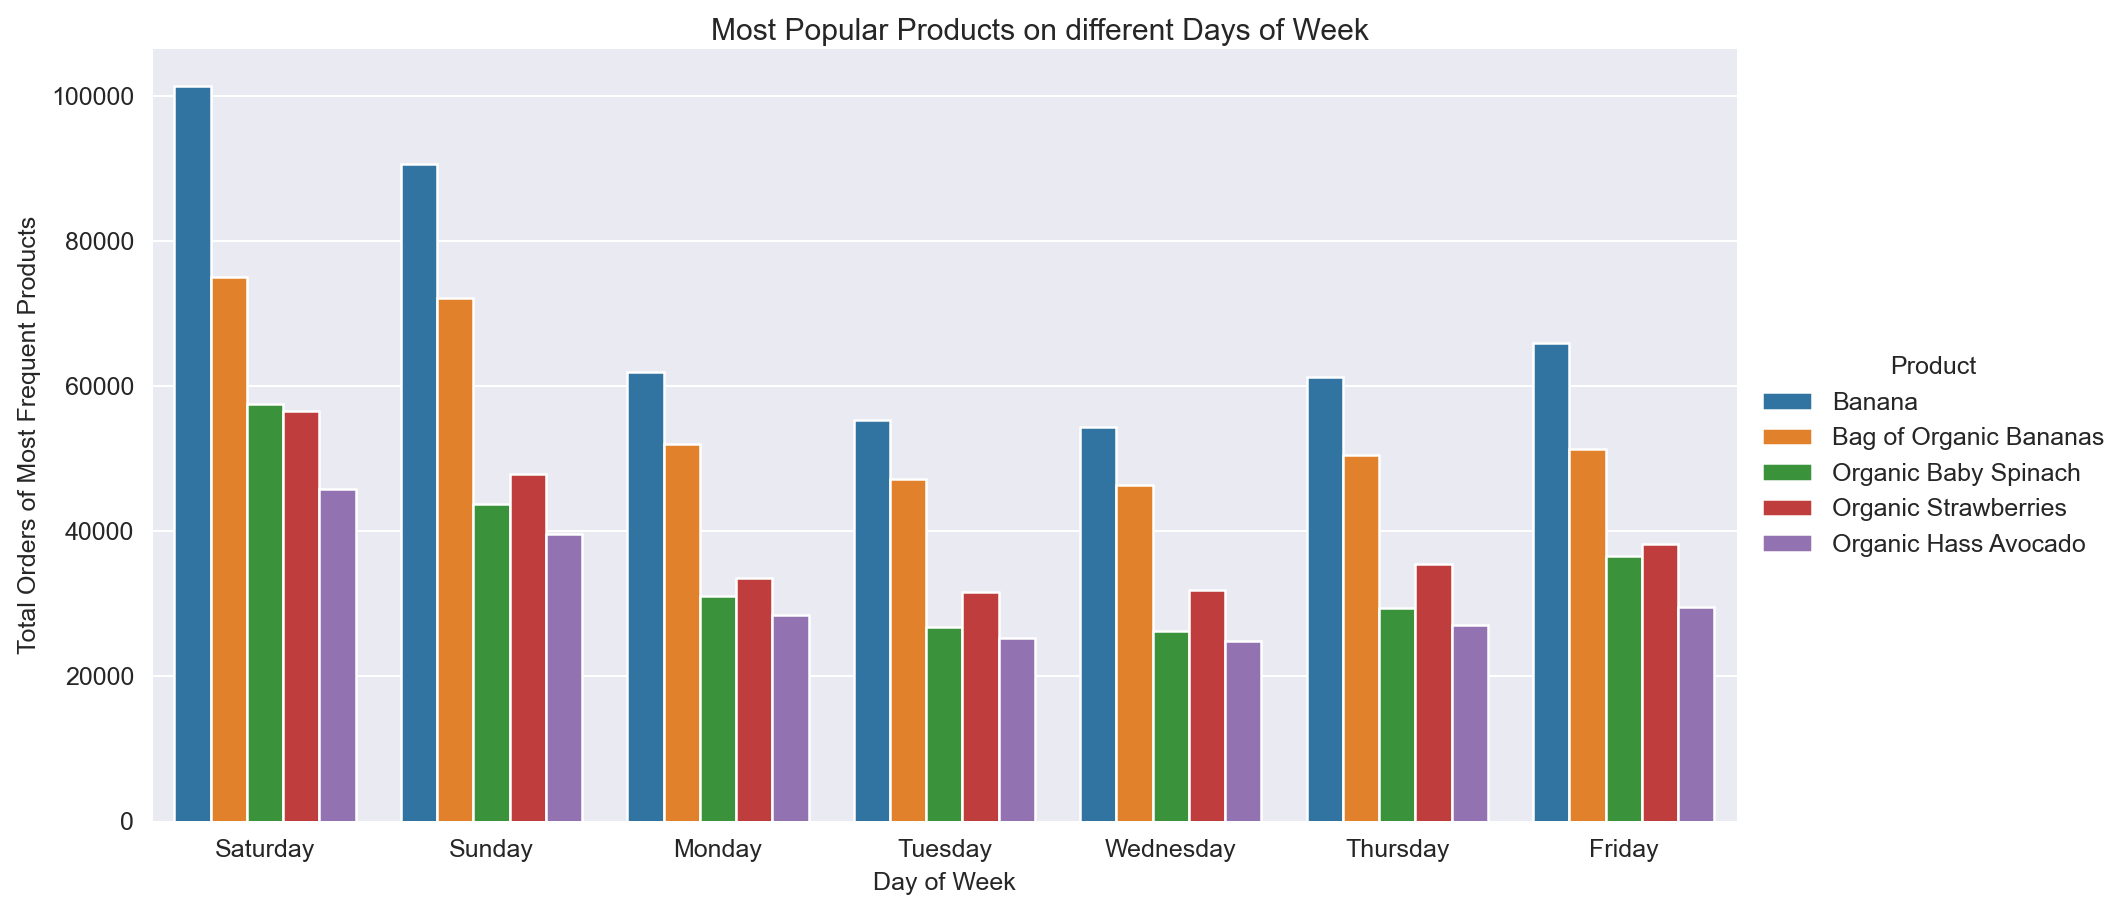

In [46]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=popular_df, kind="bar", legend=False,height=5, aspect=2)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

- Bananas and organic fruits are frequently ordered, with inorganic and organic bananas topping the spot every day.
- There are only more organic baby spinach ordered than strawberries on Saturdays.

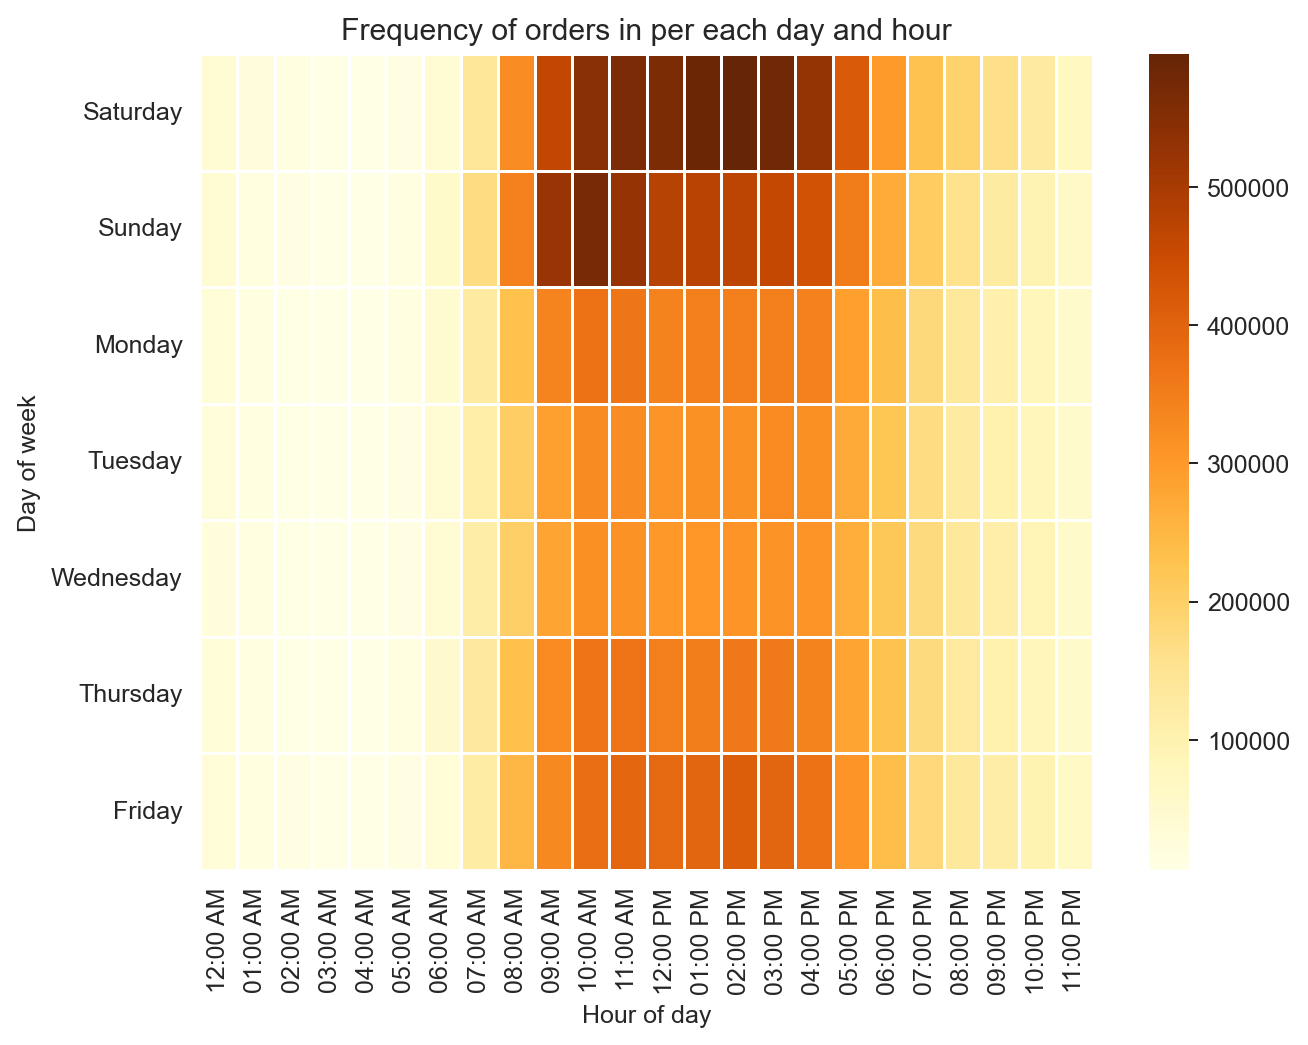

In [47]:
# Heatmap of the count of orders in each day with each hour
groupeddf = combined_order.groupby(['order_dow', 'order_hour_of_day'])['order_id'].agg('count').reset_index().rename(columns={'order_id':'orders_count'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'orders_count')

ax = sns.heatmap(data=heatmap_data, cmap="YlOrBr", linewidths=.5)
plt.title('Frequency of orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

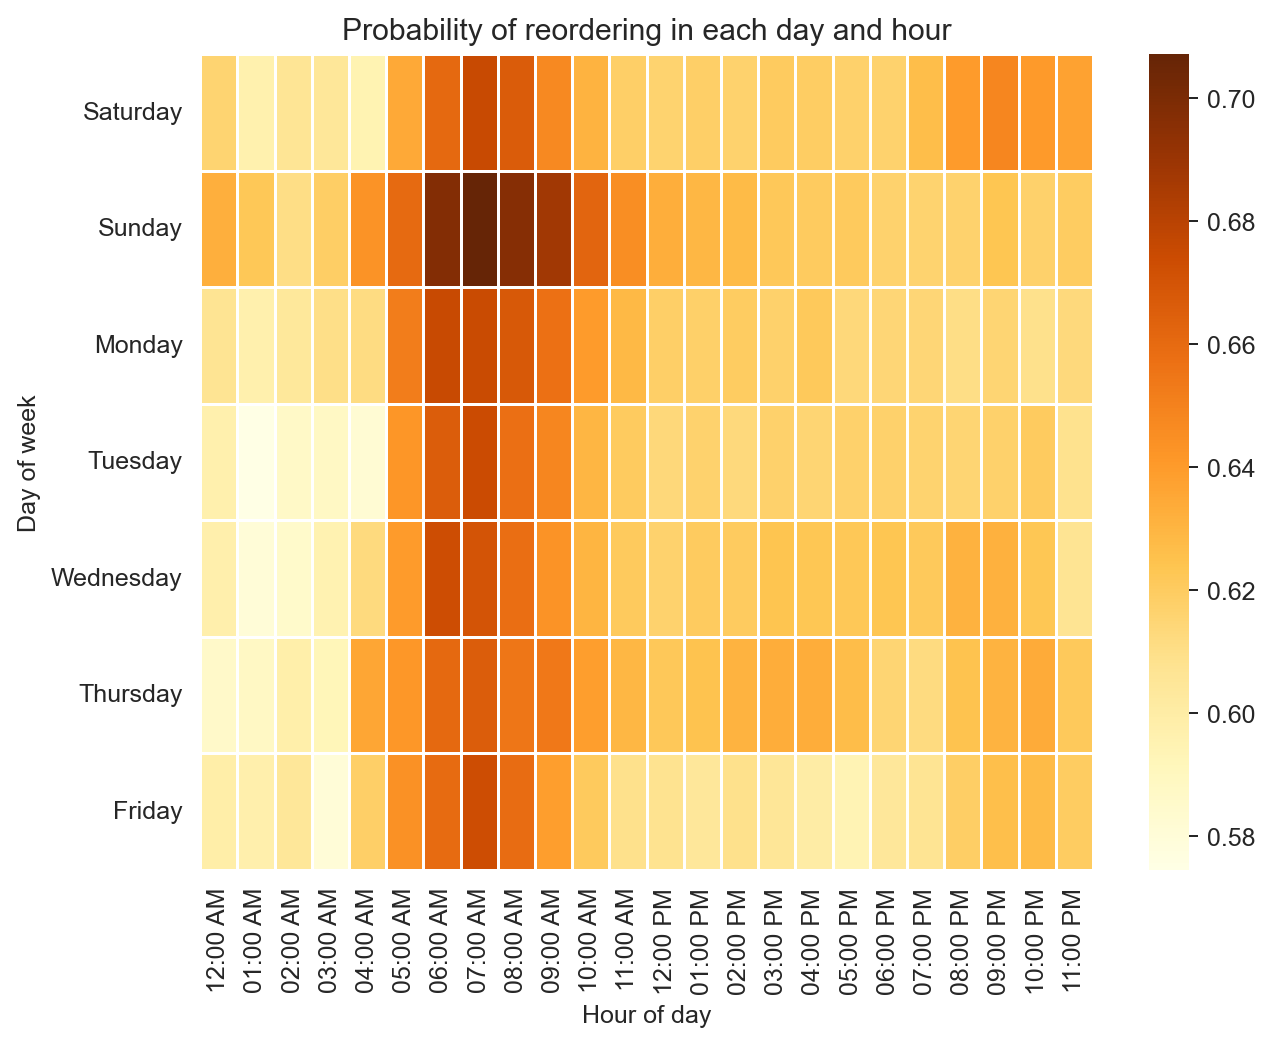

In [48]:
# Heatmap on the propability of non-new users to reorder for each day each hour
non_first_orders = combined_order['order_number'] != 1
groupeddf = combined_order[non_first_orders].groupby(['order_dow', 'order_hour_of_day']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
heatmap_data = groupeddf.pivot('order_dow', 'order_hour_of_day', 'reordered_ratio')

ax = sns.heatmap(data=heatmap_data, cmap="YlOrBr", linewidths=.5)
plt.title('Probability of reordering in each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

**Association between days since last order and the ratio of reorders**
- 74 % of products bought at the same day of previous order, are reorders
- 69% of products bought after 1 week of previous order, are reorders
- Conclusion:
    - if future order will be at the same day of previous order, percentage of reorders in the future product is high.
    - if future order will be after a week from the previous order, percentage of reorders in the future product is high.